<font size="10">Philadelphia Property Value Prediction</font>

This notebook serves as the final project of Job Connector-Data Science and Machine Learning program at Purwadhika Start-up and Coding School.

# Library

In [442]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json

from scipy import stats
import math
from scipy.stats import skew
from scipy.stats import normaltest

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
%matplotlib inline

# Import Data

In [151]:
df=pd.read_csv('/Final Project Purwadhika/Data/df_predict.csv',low_memory=False)
df.head()

building_code_description category_code_description central_air  depth  \
0   ROW W/GAR 3 STY MASONRY             Single Family           N   49.0   
1         ROW 3 STY MASONRY             Single Family           Y   49.0   
2         ROW 3 STY MASONRY             Single Family           N   49.0   
3         ROW 3 STY MASONRY             Single Family           Y  100.0   
4         ROW 3 STY MASONRY             Single Family           N  100.0   

   exterior_condition fireplaces  frontage  interior_condition  \
0                 5.0          0     15.90                 5.0   
1                 2.0          0     15.90                 2.0   
2                 4.0          0     14.80                 4.0   
3                 4.0          0     14.33                 4.0   
4                 4.0          0     15.00                 4.0   

         location  market_value  number_of_bathrooms  number_of_bedrooms  \
0  108 WHARTON ST      186800.0                  2.0                 4.0   
1  110 WHARTON ST      341600.0                  1.0                 3.0   
2  112 WHARTON ST      226200.0                  1.0                 4.0   
3  114 WHARTON ST      241500.0                  2.0                 4.0   
4  116 WHARTON ST      237000.0                  2.0                 4.0   

   number_of_rooms  number_stories other_building  parcel_number parcel_shape  \
0              7.0             3.0              N       11000600            E   
1              4.0             3.0              N       11000700            E   
2              5.0             2.0              N       11000800            E   
3              8.0             2.0              N       11000900            E   
4              6.0             3.0              N       11001000            E   

    sale_date  sale_price street_designation topography  total_area  \
0  1951-01-31         1.0                ST           F       779.0   
1  2017-04-14    395000.0                ST           F       779.1   
2  1975-09-04         1.0                ST           F       725.2   
3  2012-02-16         1.0                ST           F      1433.0   
4  2017-07-21         1.0                ST           F      1500.0   

   total_livable_area unfinished view_type  year_built  zip_code zoning  \
0              1650.0          F         I      1920.0     19147   RSA5   
1              1203.0          F         I      1920.0     19147   RSA5   
2              1482.0          F         I      1920.0     19147   RSA5   
3              2049.0          F         I      1920.0     19147   RSA5   
4              1155.0          F         I      1920.0     19147   RSA5   

                  new_zoning  sale_year sale_year_group parking_spaces  \
0  Residential Single Family     1951.0       1955-1951              1   
1  Residential Single Family     2017.0       2020-2016              0   
2  Residential Single Family     1975.0       1975-1971              0   
3  Residential Single Family     2012.0       2015-2011              0   
4  Residential Single Family     2017.0       2020-2016              0   

   overall_condition  property_age  
0                5.0         100.0  
1                2.0         100.0  
2                4.0         100.0  
3                4.0         100.0  
4                4.0         100.0

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495390 entries, 0 to 495389
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   building_code_description  495390 non-null  object 
 1   category_code_description  495390 non-null  object 
 2   central_air                495390 non-null  object 
 3   depth                      495390 non-null  float64
 4   exterior_condition         495390 non-null  float64
 5   fireplaces                 495390 non-null  object 
 6   frontage                   495390 non-null  float64
 7   interior_condition         495390 non-null  float64
 8   location                   495390 non-null  object 
 9   market_value               495390 non-null  float64
 10  number_of_bathrooms        495390 non-null  float64
 11  number_of_bedrooms         495390 non-null  float64
 12  number_of_rooms            495390 non-null  float64
 13  number_stories             49

# Goals

Exploratory Data Analysis (EDA) were used:
1. To know the correlation between features and/or label.
2. To gain insights about our data characteristics (distribution, unique value, etc).
3. To try to figure out how the features affecting the label and to find out whether there are interactions between features. 
4. And also, to determine the proper preprocessing of our data for prediction model building.

# Label Analysis: Market Value

## Data Distribution

In [153]:
df['market_value'].describe()

count    4.953900e+05
mean     2.429426e+05
std      2.115380e+06
min      6.800000e+03
25%      7.630000e+04
50%      1.320000e+05
75%      2.124000e+05
max      3.705564e+08
Name: market_value, dtype: float64

In previous file, the data had been trimmed by the Q1 market value of vacant land category code, thus explaining the min value above. Let's check the distribution using histogram.

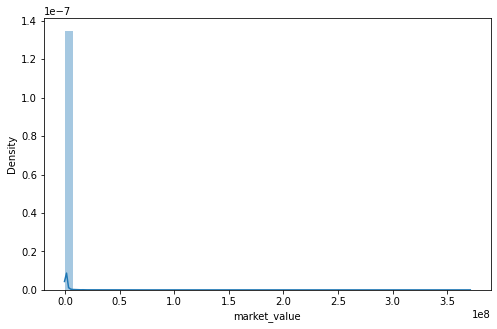

In [154]:
plt.figure(figsize=(8,5))
sns.distplot(df['market_value'], kde=True)
plt.show()

It seems that the market value outliers are interfering the histogram.

In [155]:
Q3=df['market_value'].describe()['75%']
Q1=df['market_value'].describe()['25%']
IQR=Q3-Q1
print(f'Outlier based on Q3 of market value starts from: {Q3+(1.5*IQR)}.')

Outlier based on Q3 of market value starts from: 416550.0.


Let's trim by the plot for better visualization.

In [156]:
len(df[df['market_value']>0.5*1e8])

112

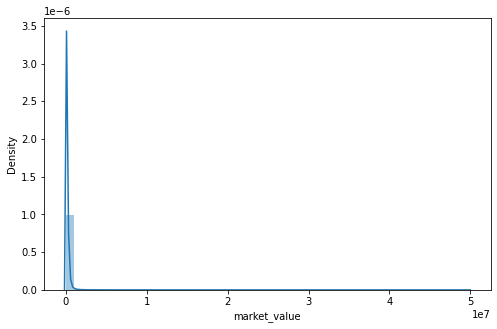

In [157]:
for_plot = df[df['market_value']<0.5*1e8]
plt.figure(figsize=(8,5))
sns.distplot(for_plot['market_value'], kde=True)
plt.show()

In [158]:
len(df[df['market_value']>0.5*1e7])

1198

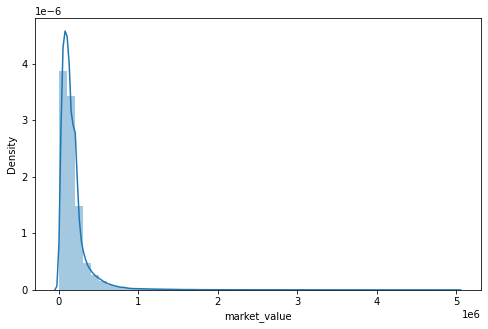

In [159]:
for_plot = df[df['market_value']<0.5*1e7]
plt.figure(figsize=(8,5))
sns.distplot(for_plot['market_value'], kde=True)
plt.show()

In [160]:
len(df[df['market_value']>2*1e6])

2974

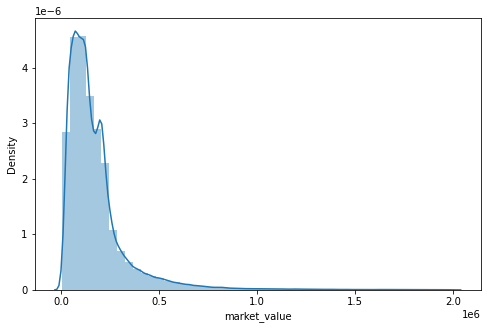

In [161]:
for_plot = df[df['market_value']<2*1e6]
plt.figure(figsize=(8,5))
sns.distplot(for_plot['market_value'], kde=True)
plt.show()

In [162]:
len(df[df['market_value']>1*1e6])

7206

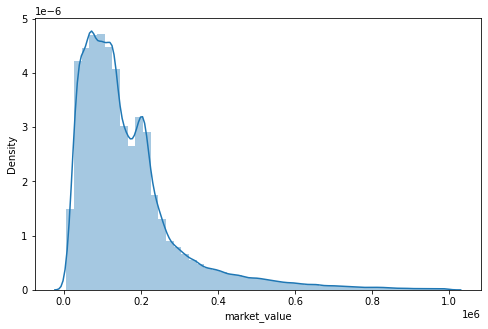

In [163]:
for_plot = df[df['market_value']<1*1e6]
plt.figure(figsize=(8,5))
sns.distplot(for_plot['market_value'], kde=True)
plt.show()

Let's trim based on outlier of Q3.

In [164]:
len(df[df['market_value']>416550])

36229

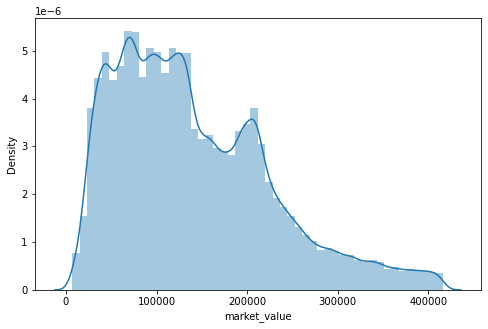

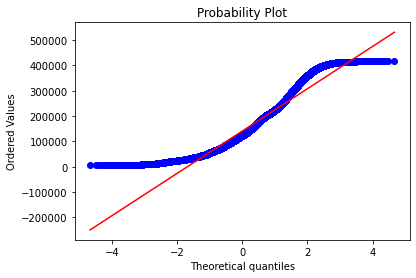

In [165]:
for_plot = df[df['market_value']<416550]
plt.figure(figsize=(8,5))
sns.distplot(for_plot['market_value'], kde=True)

fig = plt.figure()
res = stats.probplot(for_plot['market_value'], plot=plt)
plt.show()

The exploration above showed that:
- The distribution of market values is not normal with an extreme positive skewness due to the presence of outliers.
- Even after trimming the outliers, the data still not normally distributed with positive skewness with peak at the beginning of the curve.
- Majority of the properties have market value around 50k to around 200k.
- The amount property decreased with the increment of market value.

## Recommendation

First and important thing to note is that this data is a real-world dataset. Thus, properties with extreme market values are considered exist and we need to carefully handle the outliers. Based on the distribution and the amount of outliers, we recommend:
- To safely remove the outliers, we need to find contextual outliers based on another column, that may explained the extreme market value. Further cleaning the features.
- Transforming the label.
- Dropping extreme outliers rows.

## Tableau Visualization

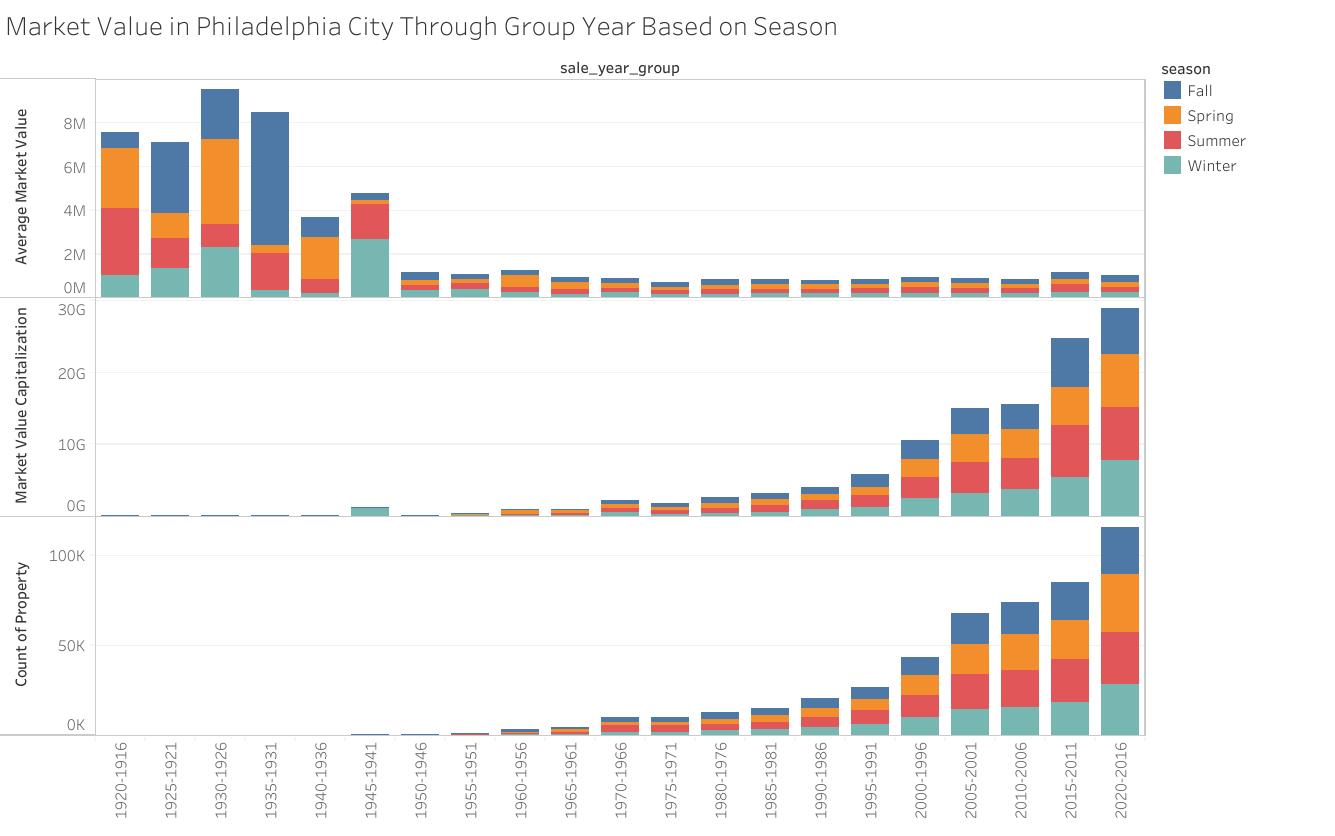

Outliers were located in data with sale year groups less than 1951. The mean for later year is much more comparable. The graph also showed the increase of market value capitalization and property count through years in Philadelphia.

# Feature Analysis

## Numerical Features

In [166]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O'] 
numerical_feature.remove('sale_price')
numerical_feature.remove('market_value')
numerical_feature.remove('parcel_number')
print ('Number of numerical feature: ', len(numerical_feature))
df[numerical_feature].head()

Number of numerical feature:  15


depth  exterior_condition  frontage  interior_condition  \
0   49.0                 5.0     15.90                 5.0   
1   49.0                 2.0     15.90                 2.0   
2   49.0                 4.0     14.80                 4.0   
3  100.0                 4.0     14.33                 4.0   
4  100.0                 4.0     15.00                 4.0   

   number_of_bathrooms  number_of_bedrooms  number_of_rooms  number_stories  \
0                  2.0                 4.0              7.0             3.0   
1                  1.0                 3.0              4.0             3.0   
2                  1.0                 4.0              5.0             2.0   
3                  2.0                 4.0              8.0             2.0   
4                  2.0                 4.0              6.0             3.0   

   total_area  total_livable_area  year_built  zip_code  sale_year  \
0       779.0              1650.0      1920.0     19147     1951.0   
1       779.1              1203.0      1920.0     19147     2017.0   
2       725.2              1482.0      1920.0     19147     1975.0   
3      1433.0              2049.0      1920.0     19147     2012.0   
4      1500.0              1155.0      1920.0     19147     2017.0   

   overall_condition  property_age  
0                5.0         100.0  
1                2.0         100.0  
2                4.0         100.0  
3                4.0         100.0  
4                4.0         100.0

In [125]:
df[numerical_feature].describe().T

count          mean            std      min       25%  \
depth                495390.0     95.864041    1684.816502      0.0     61.75   
exterior_condition   495390.0      3.897222       0.712926      0.0      4.00   
frontage             495390.0     50.109601    2755.516177      0.0     15.00   
interior_condition   495390.0      3.894453       0.716398      0.0      4.00   
number_of_bathrooms  495390.0      1.408797       2.378050      0.0      1.00   
number_of_bedrooms   495390.0      3.228615       2.106874      0.0      3.00   
number_of_rooms      495390.0      6.404729       4.236618      0.0      6.00   
number_stories       495390.0      2.142072       0.628597      0.0      2.00   
total_area           495390.0   3389.784747  296353.263211      1.0    960.11   
total_livable_area   495390.0   2084.347111   12435.741784      0.0   1096.00   
year_built           495390.0   1935.267529      25.586855   1652.0   1920.00   
zip_code             495390.0  19134.096520      12.829099  19102.0  19124.00   
sale_year            495390.0   2003.658144      14.659108   1918.0   1998.00   
overall_condition    495390.0      3.895838       0.712023      0.0      4.00   
property_age         495390.0     84.732471      25.586855      0.0     70.00   

                         50%      75%          max  
depth                   80.0    100.0     544500.0  
exterior_condition       4.0      4.0          7.0  
frontage                16.0     21.5     871200.0  
interior_condition       4.0      4.0          7.0  
number_of_bathrooms      1.0      1.0         90.0  
number_of_bedrooms       3.0      3.0         93.0  
number_of_rooms          6.0      6.0        154.0  
number_stories           2.0      2.0         61.0  
total_area            1360.0   2160.0  207694080.0  
total_livable_area    1280.0   1638.0    2445358.0  
year_built            1925.0   1950.0       2020.0  
zip_code             19136.0  19145.0      19154.0  
sale_year             2007.0   2015.0       2020.0  
overall_condition        4.0      4.0          7.0  
property_age            95.0    100.0        368.0

### Distribution

Let's check the distribution using normal test:

In [126]:
a=[]
b=[]
c=[]
d=[]
for feature in df[numerical_feature].columns:
    t,pval=normaltest(df[feature])
    a.append(feature)
    b.append(t)
    c.append(pval)
    
    skewed_feats = skew(df[feature])
    d.append(skewed_feats)
    
pd.DataFrame({'feature':a,'statistics':b,'p-value':c,'skew':d})

feature    statistics  p-value        skew
0                 depth  2.582269e+06      0.0  250.857842
1    exterior_condition  1.258978e+05      0.0   -0.840009
2              frontage  2.393843e+06      0.0  191.740854
3    interior_condition  1.251492e+05      0.0   -0.841883
4   number_of_bathrooms  1.177554e+06      0.0   24.631792
5    number_of_bedrooms  1.148223e+06      0.0   23.037490
6       number_of_rooms  1.183700e+06      0.0   24.910029
7        number_stories  9.678649e+05      0.0   14.907941
8            total_area  3.367957e+06      0.0  694.943479
9    total_livable_area  1.691928e+06      0.0   63.107530
10           year_built  5.582315e+04      0.0    0.245979
11             zip_code  4.596253e+04      0.0   -0.462300
12            sale_year  1.132798e+05      0.0   -1.377056
13    overall_condition  1.260157e+05      0.0   -0.839401
14         property_age  5.582315e+04      0.0   -0.245979

**Skew value interpretation:** [Reference](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics#:~:text=If%20the%20skewness%20is%20between,the%20data%20are%20highly%20skewed)
- Skewness between -0.5 and 0.5 means that the data are fairly symmetrical.
- Skewness between -1 to -0.5 and 0.5 to 1 means that the data are moderately skewed.
- Skewness less than -1 or more than 1 means that the data are highly skewed.

Most of the numerical features are not normally distributed. Since the data are extremely skewed, it is not recommended to plot the data distribution.

### Correlation between Numerical Features

Let's check the correlation between numerical features:

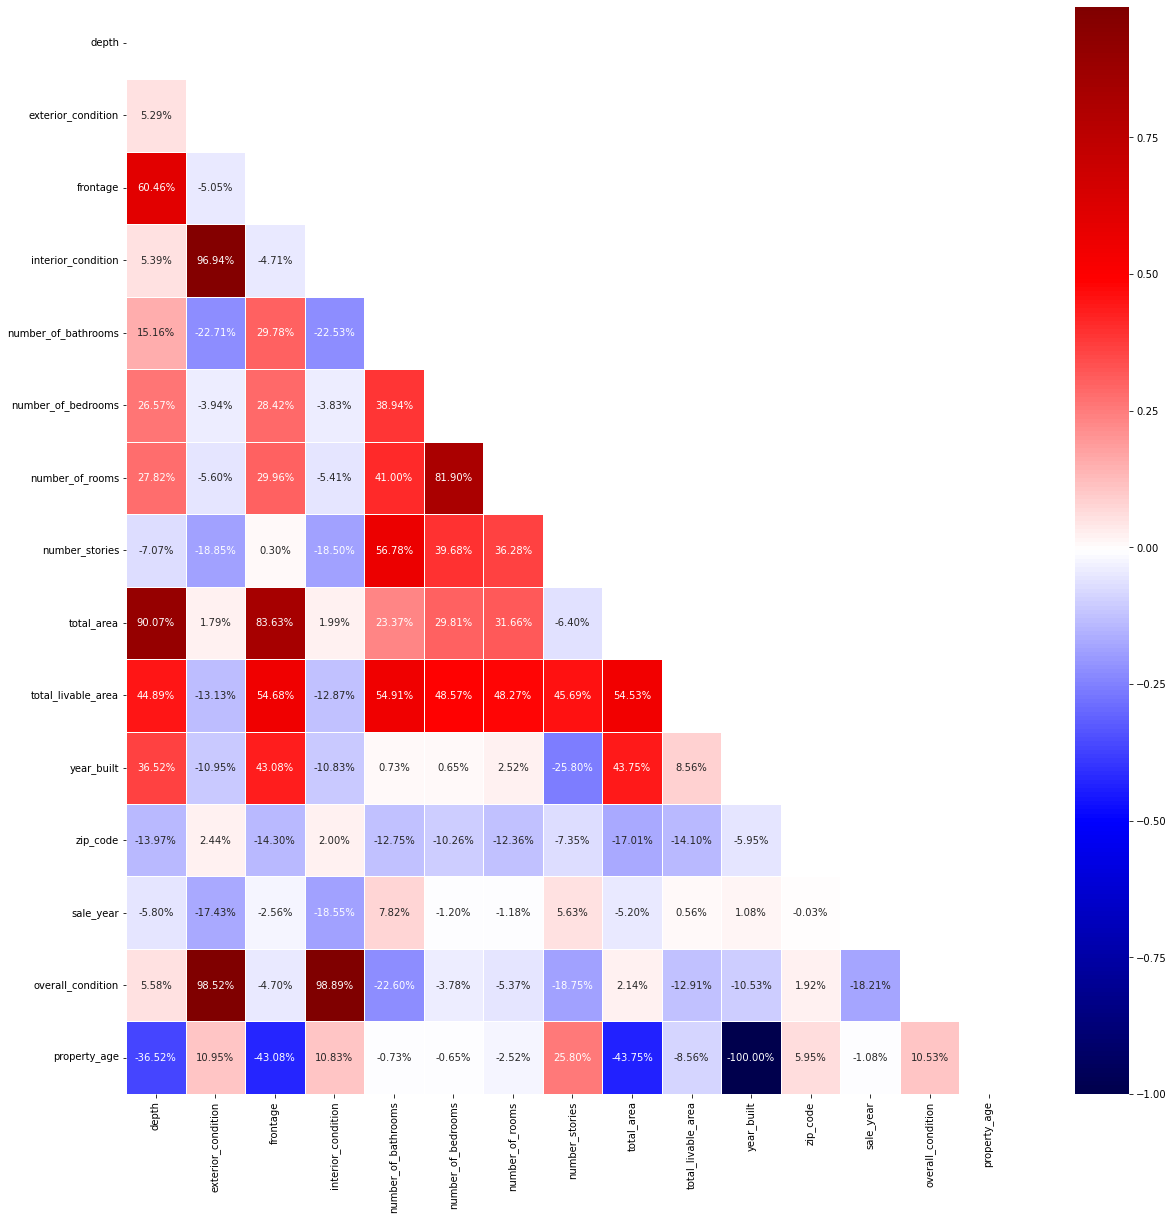

In [149]:
corr=df[numerical_feature].corr(method='spearman')

plt.figure(figsize=(20,20))
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)
plt.show()

**Spearman Correlation Interpretation:** [Reference](https://www.researchgate.net/figure/Interpretation-Table-of-Spearman-Rank-Order-Correlation-Coefficients_tbl1_267339455)
- 0.01-0.19: No relationship
- 0.20-0.29: Weak relationship
- 0.30-0.39: Moderate relationship
- 0.40-0.69: Strong relationship
- More than or equals to 0.70: Very strong relationship

From heatmap above, it is clear that:
1. Depth and frontage are strongly correlated to each other and both very strongly correlated to total area. It's because depth multiplied by frontage resulting in total area.
2. Interior condition and exterior condition are very strongly correlated with each other. Overall condition column was made to represent both column simultaneously.
3. Number of bathrooms, number of bedrooms, number of rooms, number stories and total area are positively correlated with each other. All will be included in modeling since they are logically important to pricing of the property. 
4. Total livable area positively correlated with number stories and total area.
5. Suprisingly, property age are negatively correlated with total area and positively correlated with number stories.

### Correlation with Label

#### Depth, Frontage, Total Area, Total Livable Area

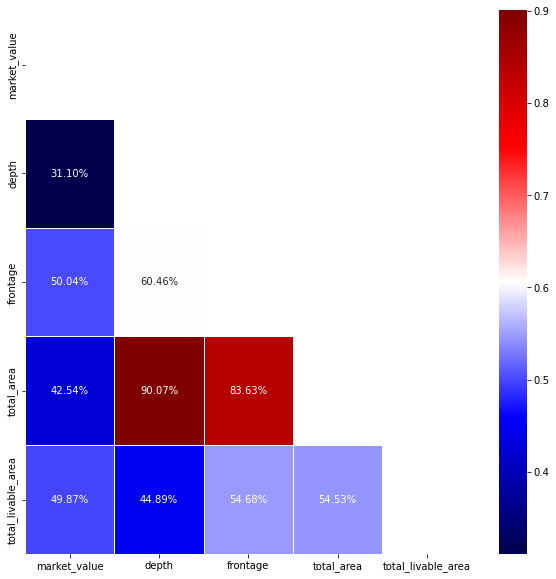

In [187]:
corr=df[['market_value','depth','frontage','total_area','total_livable_area']].corr(method='spearman')
plt.figure(figsize=(10,10))
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)
plt.show()

From the heatmap above, frontage, total area and total livable area were strongly correlated with market price, while depth was moderately correlated to it. Frontage may affect the market value because it's affecting the visibility and accessibility of the property, while the depth only affecting the size of property. Total area and total livable area as the size of the property undoubtedly were affecting the market price. Let's plot them.

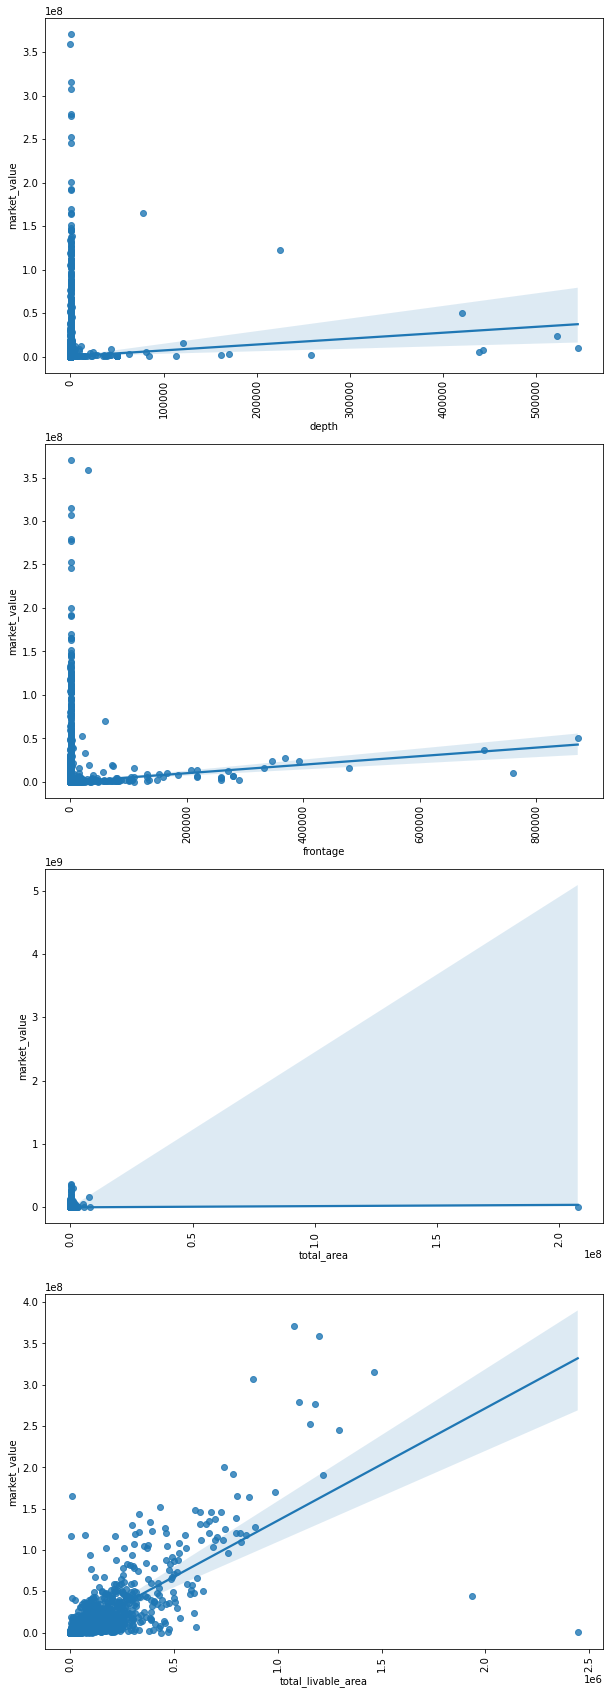

In [188]:
fig, ax = plt.subplots(4,1, figsize=(10,30))
for variable, subplot in zip(['depth','frontage','total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Based on market value, both depth and frontage have a lot of contextual outliers. Thus, it's better to drop them, since the information of property size is also represented by total area.

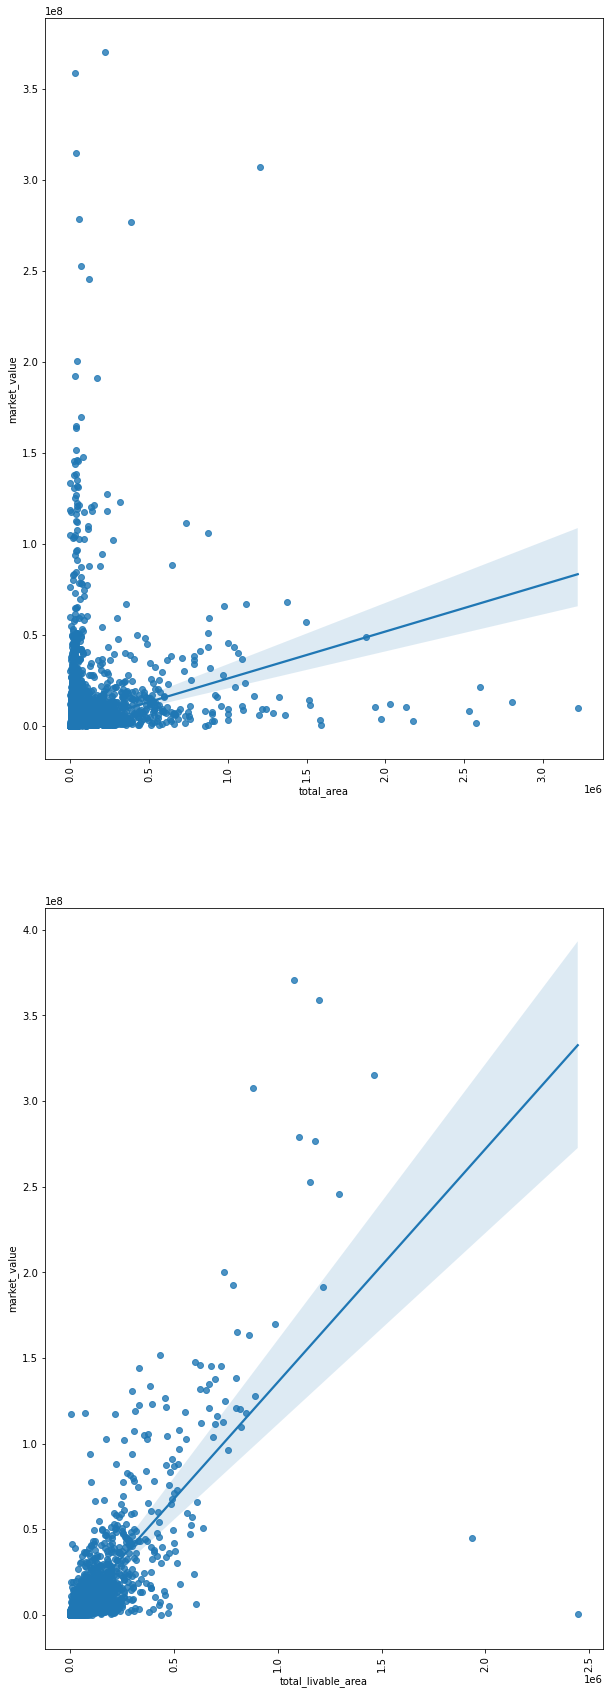

In [198]:
for_plot = df[df['total_area']<4*1e6]
fig, ax = plt.subplots(2,1, figsize=(10,30))
for variable, subplot in zip(['total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=for_plot, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

By trimming several extreme values in total area, the visualization of total area became better. But, there are still too much outliers in both features. It is recommended to delete the contextual outlier and scale them using RobustScaler in model building.

Why can't we just delete all of the outlier?

In [191]:
df['total_area'].describe()

count    4.953900e+05
mean     3.389785e+03
std      2.963533e+05
min      1.000000e+00
25%      9.601100e+02
50%      1.360000e+03
75%      2.160000e+03
max      2.076941e+08
Name: total_area, dtype: float64

For total area, maybe we can correct or delete the anomalies based on other columns before modeling.

In [197]:
df[df['total_livable_area']>500000][['building_code_description','total_area','total_livable_area','number_stories']].sort_values('number_stories',ascending=False)

building_code_description  total_area  total_livable_area  \
489496   OFF BLD COM NO GAR MASON     32876.0           1464000.0   
490665  OFF BLD N/COM W/PKG MASON     30179.0           1200021.0   
490666   OFF BLD COM NO GAR MASON     51574.0           1103287.0   
490480   OFF BLD COM NO GAR MASON     64431.0           1152480.0   
469325    APTS 100+ UNITS MASONRY     23280.0            677140.0   
...                           ...         ...                 ...   
467973    APTS 100+ UNITS MASONRY   5248824.0            597188.0   
482021         AMUSE HALL MASONRY   1206908.0            880949.0   
468048    APTS 100+ UNITS MASONRY    879912.0            563768.0   
464037        MISC MUSEUM MASONRY    311176.0            595355.0   
460560  OFF BLD N/PKG N/COM MASON    231407.0            891135.0   

        number_stories  
489496            61.0  
490665            58.0  
490666            44.0  
490480            41.0  
469325            40.0  
...                ...  
467973             2.0  
482021             2.0  
468048             2.0  
464037             1.0  
460560             1.0  

[56 rows x 4 columns]

However, the extreme value of total livable area is justified by the presence of number stories. Thus, hypothetically, we can't drop data with extreme values in total livable area. Also, based on scatter plot, it surely can help us predict the market value. 

What if we bin the total area and total livable area to make them more representable?

In [241]:
df['total_livable_area'].describe()

count    4.953900e+05
mean     2.084347e+03
std      1.243574e+04
min      0.000000e+00
25%      1.096000e+03
50%      1.280000e+03
75%      1.638000e+03
max      2.445358e+06
Name: total_livable_area, dtype: float64

In [242]:
def bin_area(x):
    if (x>0)&(x<=1.09*1e3):
        return '1'
    elif (x>1.09*1e3)&(x<=1.28*1e3):
        return '2'
    elif (x>1.28*1e3)&(x<=1.638*1e3):
        return '3'
    elif (x>1.638*1e3):
        return '4'

In [243]:
df['livable_bin']=df['total_livable_area'].apply(lambda x: bin_area(x))

In [268]:
df.groupby('livable_bin')['market_value'].describe()

count           mean           std     min       25%  \
livable_bin                                                            
1            121388.0  104413.675981  7.709998e+04  6800.0   45800.0   
2            126805.0  125082.131619  7.353235e+04  6800.0   73300.0   
3            123291.0  159800.820011  3.477737e+05  7100.0   91700.0   
4            123831.0  582144.586574  4.196997e+06  7100.0  149800.0   

                  50%       75%          max  
livable_bin                                   
1             83500.0  142100.0    3260900.0  
2            114500.0  156300.0    1191800.0  
3            143900.0  207100.0  117456100.0  
4            253300.0  423600.0  370556400.0

In [312]:
med=df.groupby('livable_bin')['market_value'].describe()['50%'].reset_index()

<AxesSubplot:xlabel='livable_bin', ylabel='50%'>

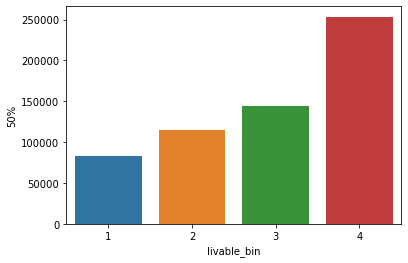

In [311]:
sns.barplot(med['livable_bin'],med['50%'])

**Summary**
1. Depth and frontage will be dropped because a lot of contextual outlier based on market value. They can be represented by total area.
2. It is recommended to further cleaning and filtering data based on total area column.
3. Based on plot result, total livable area hypothetically will be an useful feature for us predict the market value.

#### Number of rooms, Number of bedrooms, Number of bathrooms, Number stories

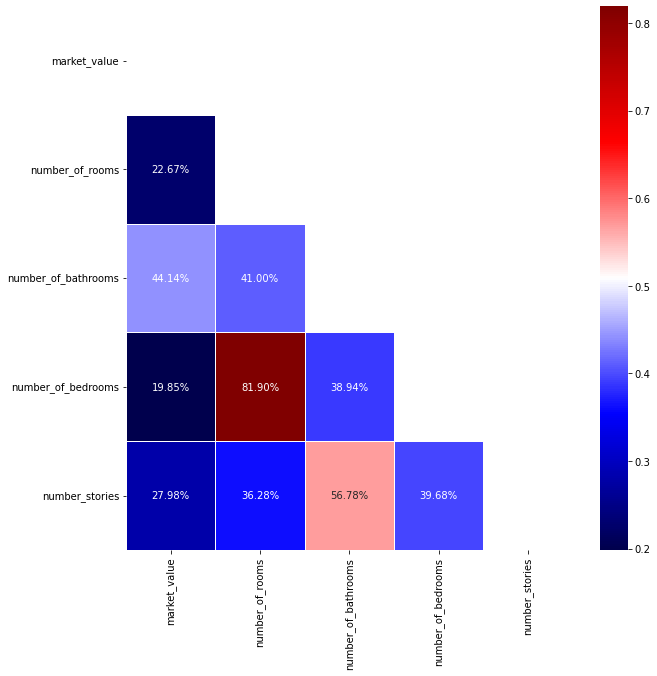

In [200]:
corr=df[['market_value','number_of_rooms','number_of_bathrooms','number_of_bedrooms','number_stories']].corr(method='spearman')
plt.figure(figsize=(10,10))
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)
plt.show()

Based on heatmap, it is clear that:
1. Both number of bedrooms and rooms didn't correlate to market value as much as number of bathrooms. 
2. Also, number of bedrooms strongly correlated with number of rooms. Maybe that's because the more bedroom the property has, the bigger the property, thus resulting in more rooms.

In [210]:
def bin_bedroom(x):
    if (x>0)&(x<=2):
        return '0-2'
    elif (x>2)&(x<=5):
        return '3-5'
    elif (x>6)&(x<=8):
        return '7/8'
    elif x>8:
        return '>8'

In [211]:
df['number_bedroom_bin']=df['number_of_bedrooms'].apply(lambda x: bin_bedroom(x))

In [213]:
df.groupby('number_bedroom_bin')['total_area'].describe()

count          mean            std   min        25%  \
number_bedroom_bin                                                           
0-2                  26295.0   1414.661874    3184.841897  50.0   666.5100   
3-5                 446630.0   2078.822402    4634.658201   1.0   975.0000   
7/8                   5192.0   8943.111483   17801.833864   1.0  1948.1575   
>8                    1268.0  63959.063549  193401.897253   1.0  1784.2750   

                         50%         75%        max  
number_bedroom_bin                                   
0-2                   887.68   1416.1650   262183.9  
3-5                  1353.60   2055.9975  1591700.0  
7/8                  3201.50   8396.2500   303485.0  
>8                  15012.96  59702.8750  5248824.0

3. Even though the correlation is really strong between number of rooms and bedrooms, both columns were kept. That's because they have different definition and both of them are important features for buying a property. 
4. Number stories were strongly correlated with number of bathrooms, since it's logically sound that every two floor have at least 1 toilet.

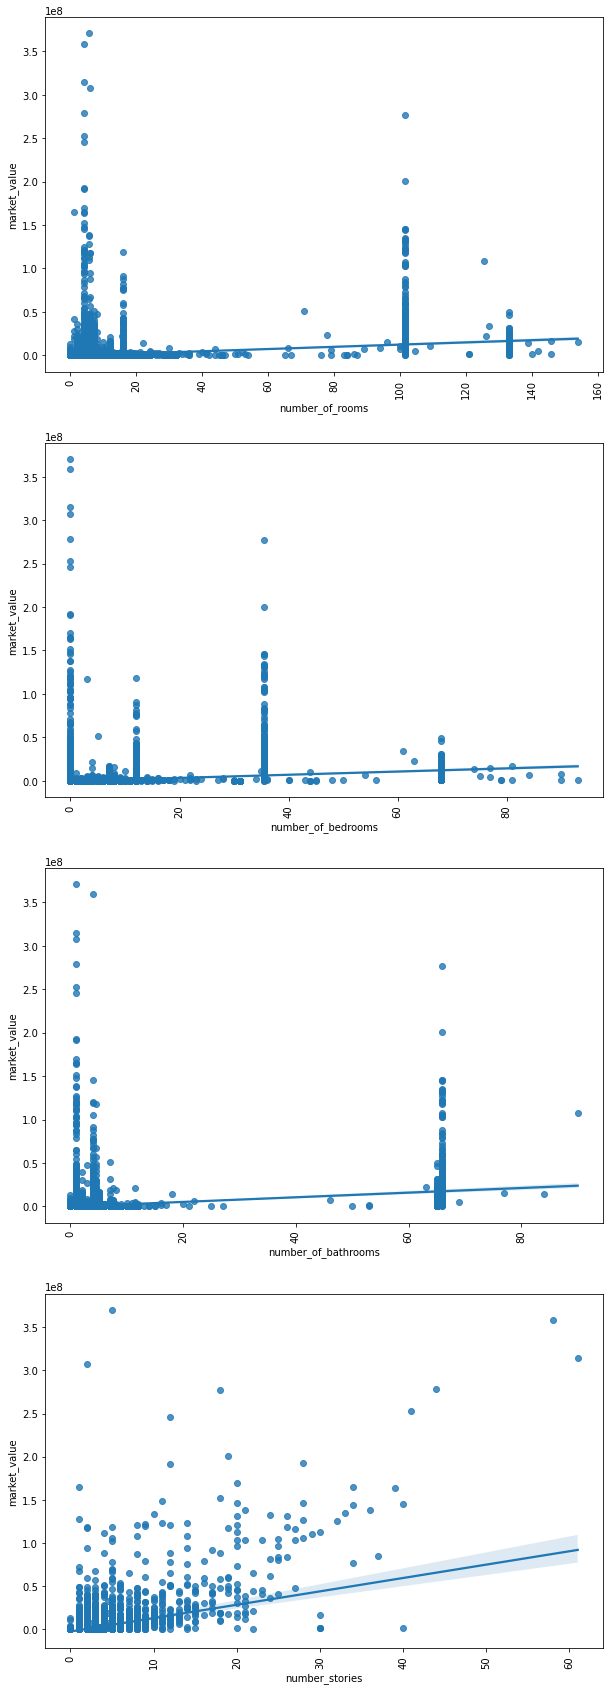

In [219]:
fig, ax = plt.subplots(4,1, figsize=(10,30))
for variable, subplot in zip(['number_of_rooms','number_of_bedrooms','number_of_bathrooms','number_stories'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### Exterior, Interior and Overall Condition

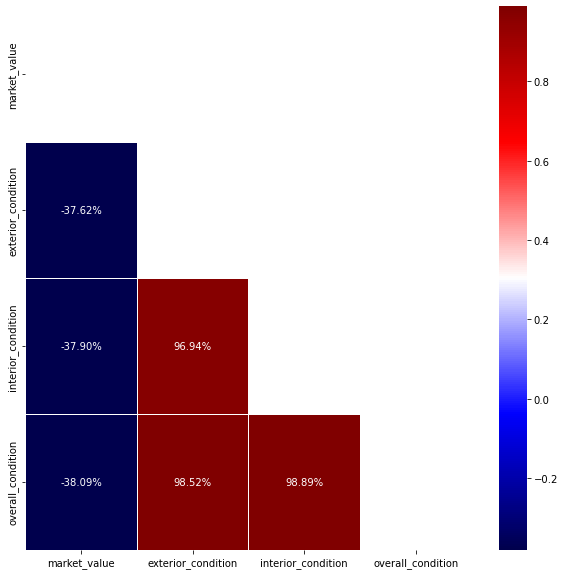

In [221]:
corr=df[['market_value','exterior_condition','interior_condition','overall_condition']].corr(method='spearman')
plt.figure(figsize=(10,10))
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)
plt.show()

Pretty straightforward. Since there are multicollinearity between interior, exterior and overall condition, their correlations with market value were comparable.

In [225]:
df['overall_condition'].describe()

count    495390.000000
mean          3.895838
std           0.712023
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           7.000000
Name: overall_condition, dtype: float64

How about we simplify overall condition further? Based on column description, 4 is the average condition, it will be the average. 1-2 will be the best condition. 2-3 will be Above average. 4-5 will be Below Average. 6-7 will be the worst.

In [227]:
def bin_condition(x):
    if (x>0)&(x<=2):
        return 'Best Condition'
    elif (x>2)&(x<=3):
        return 'Above Average'
    elif (x>3)&(x<=4)&(x<5):
        return 'Average Condition'
    elif (x>=5)&(x<6):
        return 'Below Average'
    elif (x>=6)&(x<=7):
        return 'Bad Condition'
    else:
        return 'None'

In [229]:
df['overall_condition_bin']=df['overall_condition'].apply(lambda x: bin_condition(x))

In [232]:
df.groupby('overall_condition_bin')['market_value'].describe()

count           mean           std     min  \
overall_condition_bin                                                  
Above Average           33396.0  480298.550725  3.172083e+06  8200.0   
Average Condition      413567.0  204113.080589  1.674583e+06  6900.0   
Bad Condition            8606.0   81734.708343  1.180113e+06  6800.0   
Below Average           16085.0  108594.553932  2.149918e+05  8000.0   
Best Condition          22429.0  761159.935797  5.545565e+06  7100.0   
None                     1307.0  286624.560061  2.699674e+06  6800.0   

                            25%       50%       75%          max  
overall_condition_bin                                             
Above Average          156000.0  283800.0  465000.0  358973100.0  
Average Condition       76600.0  127300.0  200000.0  370556400.0  
Bad Condition           14300.0   26400.0   55200.0  105685800.0  
Below Average           35700.0   61000.0  115300.0   12208600.0  
Best Condition         203300.0  363000.0  529200.0  307363100.0  
None                    50900.0   94500.0  186450.0   94133200.0

In [316]:
med=df.groupby('overall_condition_bin')['market_value'].describe()['50%'].reset_index()
med=med.drop(index=5,axis=0).sort_values('50%')

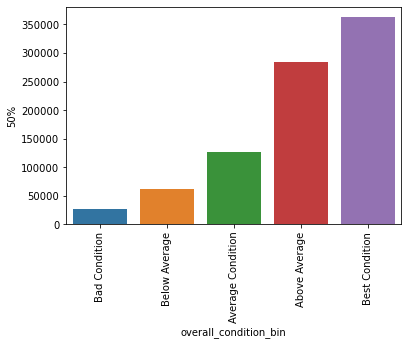

In [321]:
ax=sns.barplot(data=med, x='overall_condition_bin', y='50%')
ax.tick_params(axis='x', rotation=90)
plt.show()

Based on mean and median, there are increase in market value with the increase of overall condition.

#### Year Built, Property Age, Sale year

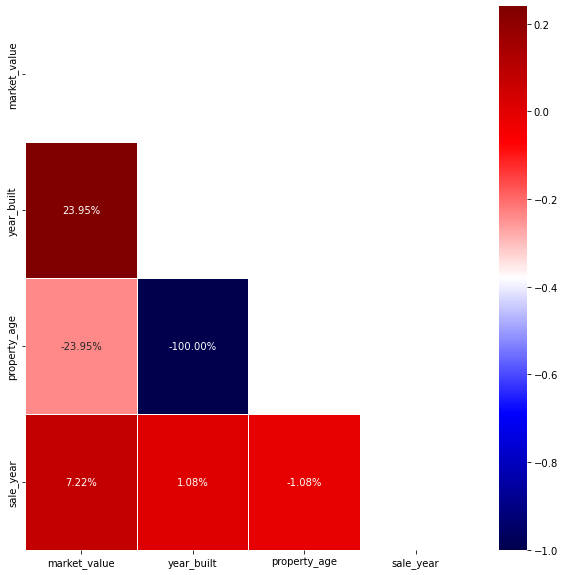

In [233]:
corr=df[['market_value','year_built','property_age','sale_year']].corr(method='spearman')
plt.figure(figsize=(10,10))
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)
plt.show()

Also pretty straightforward. An increase in property age (or decrease in year built) was weakly correlated with the decrease market value. Maybe the correlation was weak because the property age doesn't always resulting in poor condition.

In [235]:
df.groupby('overall_condition_bin')['property_age'].describe()

count       mean        std  min   25%    50%  \
overall_condition_bin                                                     
Above Average           33396.0  83.413792  42.780293  1.0  60.0   95.0   
Average Condition      413567.0  85.636535  20.857116  3.0  70.0   95.0   
Bad Condition            8606.0  97.562747  12.725510  4.0  95.0  100.0   
Below Average           16085.0  96.332048  16.804768  8.0  95.0   95.0   
Best Condition          22429.0  56.389094  49.354333  0.0   5.0   70.0   
None                     1307.0  91.514920  22.740706  1.0  81.0   95.0   

                         75%    max  
overall_condition_bin                
Above Average          100.0  357.0  
Average Condition      100.0  368.0  
Bad Condition          105.0  226.0  
Below Average          100.0  287.0  
Best Condition         100.0  295.0  
None                   100.0  220.0

That said, the property in Philadelphia maybe was build with a good quality material or often maintenanced by government/property agent/owner.

Sale year didn't much affect to the market value.

In [237]:
df['sale_year_group']=df['sale_year'].apply(lambda x: '2020-2016' if (x<=2020) & (x>2015) else 
                    '2015-2011' if (x<=2015) & (x>2010) else '2010-2006' if (x<=2010) & (x>2005) else
                    '2005-2001' if (x<=2005) & (x>2000) else '2000-1996' if (x<=2000) & (x>1995) else
                    '1995-1991' if (x<=1995) & (x>1990) else '1990-1986' if (x<=1990) & (x>1985) else
                    '1985-1981' if (x<=1985) & (x>1980) else '1980-1976' if (x<=1980) & (x>1975) else
                    '1975-1971' if (x<=1975) & (x>1970) else '1970-1966' if (x<=1970) & (x>1965) else
                    '1965-1961' if (x<=1965) & (x>1960) else '1960-1956' if (x<=1960) & (x>1955) else
                    '1955-1951' if (x<=1955) & (x>1950) else '1950-1946' if (x<=1950) & (x>1945) else
                    '1945-1941' if (x<=1945) & (x>1940) else '1940-1936' if (x<=1940) & (x>1935) else
                    '1935-1931' if (x<=1935) & (x>1930) else '1930-1926' if (x<=1930) & (x>1925) else
                    '1925-1921' if (x<=1925) & (x>1920) else '1920-1916' if (x<=1920) & (x>1915) else
                    '1915-1911' if (x<=1915) & (x>1910) else '0')

In [238]:
df.groupby('sale_year_group')['market_value'].describe()

count          mean           std      min       25%  \
sale_year_group                                                            
1920-1916            67.0  2.109484e+06  4.442739e+06  48100.0  178550.0   
1925-1921           102.0  1.666163e+06  4.395570e+06   8900.0  109350.0   
1930-1926            90.0  2.628899e+06  1.269512e+07  10000.0   80800.0   
1935-1931            50.0  2.190920e+06  1.017103e+07  30600.0   89625.0   
1940-1936           178.0  8.704062e+05  3.469440e+06   9300.0  125600.0   
1945-1941           712.0  1.977568e+06  9.334608e+06   7400.0   70875.0   
1950-1946           769.0  3.050333e+05  1.408200e+06   7600.0   51400.0   
1955-1951          1722.0  2.725911e+05  1.723953e+06   7400.0   49800.0   
1960-1956          3307.0  2.991231e+05  2.148433e+06   7700.0   64100.0   
1965-1961          4699.0  2.361257e+05  2.273450e+06   7500.0   73850.0   
1970-1966         10272.0  2.168304e+05  2.209450e+06   7100.0   57675.0   
1975-1971         10423.0  1.890252e+05  1.264701e+06   7100.0   67000.0   
1980-1976         12881.0  2.114394e+05  1.303508e+06   7200.0   74200.0   
1985-1981         15409.0  2.090128e+05  1.086652e+06   6800.0   67700.0   
1990-1986         20881.0  2.031261e+05  1.334798e+06   6800.0   73100.0   
1995-1991         27234.0  2.176096e+05  1.893443e+06   6800.0   73200.0   
2000-1996         43556.0  2.418131e+05  2.542146e+06   7000.0   75100.0   
2005-2001         68109.0  2.214741e+05  1.918917e+06   6800.0   82200.0   
2010-2006         74362.0  2.110702e+05  1.798453e+06   6800.0   75400.0   
2015-2011         84997.0  2.916785e+05  2.593850e+06   6800.0   83200.0   
2020-2016        115570.0  2.501897e+05  2.066834e+06   6800.0   78500.0   

                      50%        75%          max  
sale_year_group                                    
1920-1916        601400.0  2110050.0   25338000.0  
1925-1921        274100.0   803775.0   35925500.0  
1930-1926        213400.0   661300.0  117915000.0  
1935-1931        162500.0   616225.0   71425300.0  
1940-1936        358600.0   485250.0   40936300.0  
1945-1941        192400.0   763100.0  165198800.0  
1950-1946         94700.0   167800.0   21277200.0  
1955-1951         91700.0   161200.0   48627400.0  
1960-1956        105600.0   193750.0   73080000.0  
1965-1961        128100.0   204950.0  131371200.0  
1970-1966        107700.0   184825.0  145888500.0  
1975-1971        122000.0   198000.0   81646900.0  
1980-1976        129100.0   207100.0   84244900.0  
1985-1981        122400.0   205000.0   64532500.0  
1990-1986        129200.0   208400.0  145500800.0  
1995-1991        125900.0   205600.0  200287300.0  
2000-1996        125400.0   205125.0  276892000.0  
2005-2001        130100.0   204500.0  315046100.0  
2010-2006        125400.0   202000.0  358973100.0  
2015-2011        147500.0   235000.0  307363100.0  
2020-2016        142100.0   230500.0  370556400.0

Maybe we need to specify based on category code.

In [239]:
df[df['category_code_description']=='Single Family'].groupby('sale_year_group')['market_value'].describe()

count           mean            std      min       25%  \
sale_year_group                                                             
1920-1916           26.0  198800.000000  161900.075355  48100.0   93325.0   
1925-1921           56.0  210973.214286  274571.570064   8900.0   98500.0   
1930-1926           52.0  157855.769231  176357.768514  10000.0   56975.0   
1935-1931           29.0  158934.482759  155387.720778  30600.0   58500.0   
1940-1936          136.0  298680.147059  209096.695980   9300.0  122275.0   
1945-1941          388.0  120134.536082  121558.974078   7400.0   50700.0   
1950-1946          684.0  112415.935673  101067.525637   7600.0   49400.0   
1955-1951         1574.0  108850.381194   90536.394338   7400.0   47075.0   
1960-1956         3072.0  127136.425781  107120.063033   7700.0   62300.0   
1965-1961         4401.0  141097.205181   97068.148783   7500.0   72600.0   
1970-1966         9248.0  123977.649221  103778.693320   7100.0   54900.0   
1975-1971         9582.0  138096.837821  107349.048883   7100.0   64400.0   
1980-1976        11411.0  147977.390237  115538.663256   7200.0   70600.0   
1985-1981        13430.0  143190.565897  131476.536561   6800.0   63300.0   
1990-1986        17907.0  149571.826660  128215.215124   6800.0   68000.0   
1995-1991        23938.0  150348.776005  136966.244087   6800.0   69400.0   
2000-1996        37753.0  148310.277329  133658.496795   7000.0   71300.0   
2005-2001        58426.0  152136.096943  130704.334738   6800.0   77300.0   
2010-2006        64320.0  153912.032027  483857.286951   6800.0   71700.0   
2015-2011        71741.0  183394.530324  187405.862144   6800.0   77100.0   
2020-2016        98982.0  180583.455578  181766.536395   6800.0   74100.0   

                      50%       75%          max  
sale_year_group                                   
1920-1916        132400.0  238125.0     641400.0  
1925-1921        110650.0  208350.0    1612600.0  
1930-1926         89100.0  203375.0    1048200.0  
1935-1931        109500.0  160800.0     630600.0  
1940-1936        264600.0  450600.0     973400.0  
1945-1941         78800.0  146050.0    1420700.0  
1950-1946         82950.0  144825.0    1053000.0  
1955-1951         84250.0  142975.0    1523500.0  
1960-1956         99100.0  188000.0    3050000.0  
1965-1961        124900.0  201800.0    1817100.0  
1970-1966        101500.0  171200.0    2506500.0  
1975-1971        117400.0  191900.0    1682600.0  
1980-1976        124700.0  199000.0    1728800.0  
1985-1981        114800.0  194300.0    4791000.0  
1990-1986        121200.0  199400.0    3382600.0  
1995-1991        119800.0  196500.0    4722700.0  
2000-1996        117800.0  191100.0    3438800.0  
2005-2001        123800.0  193700.0    2842800.0  
2010-2006        120100.0  192400.0  117456100.0  
2015-2011        137400.0  217700.0    5477000.0  
2020-2016        134900.0  218600.0    3983600.0

Nope. Maybe based on total livable area. First, we need to bin them.

In [248]:
df[df['livable_bin']=='1'].groupby('sale_year_group')['market_value'].describe()

count           mean            std      min       25%  \
sale_year_group                                                             
1920-1916            5.0  111760.000000   55951.970475  66200.0   72100.0   
1925-1921           25.0   91692.000000   41914.694321   8900.0  103200.0   
1930-1926            8.0  137012.500000  221211.601591  10000.0   24850.0   
1935-1931           12.0   99575.000000   43110.600363  30600.0   62025.0   
1940-1936           14.0  105028.571429   72939.241613   9300.0   47350.0   
1945-1941          129.0   92793.798450  117287.307332   7400.0   41100.0   
1950-1946          269.0   89303.345725   62575.683936   7600.0   40500.0   
1955-1951          536.0   81467.350746   60250.465677   7400.0   33700.0   
1960-1956          830.0   91738.795181   64798.550137   7700.0   41025.0   
1965-1961          993.0   92845.820745   67336.528944   7500.0   42700.0   
1970-1966         2286.0   79199.868766   59703.431355   7100.0   35400.0   
1975-1971         2335.0   90407.537473   73682.136648   7100.0   40550.0   
1980-1976         2704.0   96290.976331   71068.026063   7200.0   42875.0   
1985-1981         3768.0   93605.599788   68529.392336   6800.0   40200.0   
1990-1986         4889.0   98622.663121   71302.056828   6800.0   41400.0   
1995-1991         6491.0   97295.979048   70522.689423   6800.0   41900.0   
2000-1996        10578.0   98798.477973   69428.629488   7000.0   45700.0   
2005-2001        16361.0  104500.568425   70068.335028   6800.0   52600.0   
2010-2006        19084.0  101977.567596   74897.487616   6800.0   47700.0   
2015-2011        20973.0  113301.878606   83677.815749   6800.0   48000.0   
2020-2016        29098.0  110790.030243   84328.871311   6800.0   46000.0   

                      50%       75%        max  
sale_year_group                                 
1920-1916         93200.0  124000.0   203300.0  
1925-1921        107300.0  109800.0   178600.0  
1930-1926         41850.0  123300.0   661800.0  
1935-1931        112400.0  127125.0   160800.0  
1940-1936         92400.0  152950.0   245700.0  
1945-1941         62800.0  105900.0  1004500.0  
1950-1946         72500.0  133300.0   363100.0  
1955-1951         64700.0  117600.0   469700.0  
1960-1956         68900.0  130825.0   425100.0  
1965-1961         71600.0  130900.0   493100.0  
1970-1966         57400.0  108625.0   489800.0  
1975-1971         68200.0  123800.0  1599000.0  
1980-1976         73100.0  132200.0   580700.0  
1985-1981         71300.0  132300.0   480800.0  
1990-1986         78400.0  138200.0   502400.0  
1995-1991         78700.0  132850.0   616100.0  
2000-1996         79800.0  131600.0   582000.0  
2005-2001         87800.0  138600.0   752700.0  
2010-2006         83100.0  134325.0  3260900.0  
2015-2011         90200.0  162800.0  1006500.0  
2020-2016         87000.0  158800.0  1684800.0

In [249]:
df[df['livable_bin']=='2'].groupby('sale_year_group')['market_value'].describe()

count           mean           std      min      25%  \
sale_year_group                                                           
1920-1916            8.0   94437.500000  29834.205561  53100.0  72675.0   
1925-1921           12.0  122375.000000  71687.365756  31700.0  64625.0   
1930-1926           23.0   79352.173913  43096.876807  21300.0  50750.0   
1935-1931            6.0   81550.000000  33188.115343  41600.0  55175.0   
1940-1936           29.0  149172.413793  73424.679077  33800.0  88800.0   
1945-1941          113.0  100756.637168  69489.945157  18700.0  51600.0   
1950-1946          185.0   97337.837838  54095.629652  12500.0  57200.0   
1955-1951          493.0  105466.328600  65333.589281   9200.0  57800.0   
1960-1956         1027.0  121164.362220  70301.363925   9000.0  69850.0   
1965-1961         1350.0  130093.481481  70307.084247   7600.0  75025.0   
1970-1966         2688.0  104415.476190  63535.940077   7400.0  56800.0   
1975-1971         2797.0  115840.007151  68691.764445   7400.0  63700.0   
1980-1976         3288.0  120843.856448  69898.917490   9700.0  69300.0   
1985-1981         3765.0  114732.324037  68279.554636   8900.0  63100.0   
1990-1986         5185.0  119478.630665  70503.824146   6900.0  66700.0   
1995-1991         7106.0  118801.069519  68886.534630   8800.0  70225.0   
2000-1996        11792.0  119264.136703  65849.562929   7700.0  73900.0   
2005-2001        18714.0  123755.247408  65393.196272   6800.0  78800.0   
2010-2006        19632.0  121030.109006  67674.950038   6800.0  74300.0   
2015-2011        20375.0  134010.890798  80836.787938   7100.0  76400.0   
2020-2016        28217.0  132693.050289  82552.080439   6800.0  73400.0   

                      50%       75%        max  
sale_year_group                                 
1920-1916         98750.0  110950.0   140800.0  
1925-1921        140650.0  150800.0   274500.0  
1930-1926         80800.0   80800.0   197600.0  
1935-1931         82300.0  103425.0   126500.0  
1940-1936        143300.0  202100.0   277000.0  
1945-1941         78200.0  131500.0   443300.0  
1950-1946         91000.0  124900.0   359600.0  
1955-1951         94400.0  135300.0   560600.0  
1960-1956        106800.0  185250.0   534200.0  
1965-1961        118750.0  189600.0   616400.0  
1970-1966         94150.0  131100.0   456700.0  
1975-1971        109100.0  146400.0   567300.0  
1980-1976        110900.0  153500.0   568400.0  
1985-1981        102700.0  150400.0   628200.0  
1990-1986        108000.0  154200.0   705300.0  
1995-1991        107100.0  147500.0  1191800.0  
2000-1996        109600.0  146200.0   640600.0  
2005-2001        115300.0  150300.0   774200.0  
2010-2006        111900.0  147700.0   699400.0  
2015-2011        121800.0  171050.0  1070100.0  
2020-2016        120200.0  170300.0  1125000.0

In [251]:
df[df['livable_bin']=='3'].groupby('sale_year_group')['market_value'].describe()

count           mean            std      min       25%  \
sale_year_group                                                             
1920-1916            7.0  244814.285714  173216.525661  48100.0  153500.0   
1925-1921            7.0  185457.142857   94276.965323  29200.0  146300.0   
1930-1926           10.0  181340.000000  126997.692018  32600.0  107950.0   
1935-1931            7.0  144914.285714   88376.437821  50400.0   73950.0   
1940-1936           26.0  117365.384615   60300.526978  31900.0   71050.0   
1945-1941           88.0  114803.409091   77962.830001   7800.0   60125.0   
1950-1946          158.0  114274.050633   78497.702656  16600.0   53100.0   
1955-1951          379.0  113160.158311   75935.110289  11000.0   54150.0   
1960-1956          919.0  132868.226333   76147.943181  10200.0   74900.0   
1965-1961         1533.0  153425.114155   71696.767551   9700.0   93700.0   
1970-1966         3016.0  135467.639257   76180.257780   7800.0   71875.0   
1975-1971         3161.0  147869.851313   80270.485135   9300.0   85800.0   
1980-1976         3790.0  151314.485488   83355.164606  10200.0   91800.0   
1985-1981         4059.0  143206.577975   81878.886737  10400.0   82350.0   
1990-1986         5506.0  148420.214312   84063.931707   8500.0   87600.0   
1995-1991         7058.0  149778.690847   88317.129466  11300.0   88425.0   
2000-1996        10850.0  148941.649770   84908.143493   9400.0   90800.0   
2005-2001        16850.0  153541.020772   84593.512869  10000.0   96000.0   
2010-2006        18270.0  158502.955665  872575.557390   7500.0   90200.0   
2015-2011        20065.0  173006.080239  110371.488304   8000.0   96100.0   
2020-2016        27532.0  173953.080052  110731.290001   7100.0   95800.0   

                      50%       75%          max  
sale_year_group                                   
1920-1916        197400.0  302400.0     556400.0  
1925-1921        208800.0  234400.0     298800.0  
1930-1926        179000.0  214850.0     464600.0  
1935-1931        134900.0  199600.0     282000.0  
1940-1936        119250.0  138250.0     286700.0  
1945-1941         80950.0  169375.0     403100.0  
1950-1946         84950.0  164350.0     436900.0  
1955-1951         86200.0  154050.0     373800.0  
1960-1956        110700.0  195850.0     486100.0  
1965-1961        157900.0  208200.0     648600.0  
1970-1966        127300.0  199200.0     675700.0  
1975-1971        137700.0  203500.0    1039300.0  
1980-1976        138900.0  203600.0     817800.0  
1985-1981        129600.0  200850.0     830000.0  
1990-1986        136200.0  203375.0     791300.0  
1995-1991        135800.0  202775.0     791600.0  
2000-1996        134800.0  200500.0     838000.0  
2005-2001        140900.0  203200.0     844500.0  
2010-2006        136400.0  201800.0  117456100.0  
2015-2011        158800.0  213200.0    1071600.0  
2020-2016        159100.0  215600.0    1343400.0

In [252]:
df[df['livable_bin']=='4'].groupby('sale_year_group')['market_value'].describe()

count          mean           std      min       25%  \
sale_year_group                                                           
1920-1916           47.0  2.942711e+06  5.092828e+06  94700.0  448050.0   
1925-1921           57.0  2.887377e+06  5.603734e+06  56800.0  499500.0   
1930-1926           48.0  4.819819e+06  1.716583e+07  59500.0  259000.0   
1935-1931           24.0  4.424854e+06  1.450389e+07  58200.0  308750.0   
1940-1936          109.0  1.340224e+06  4.376019e+06  45800.0  375900.0   
1945-1941          378.0  3.624588e+06  1.258989e+07  23000.0  335050.0   
1950-1946          157.0  1.111371e+06  2.987241e+06  18200.0  118100.0   
1955-1951          314.0  1.053671e+06  3.946150e+06  15700.0  100125.0   
1960-1956          529.0  1.257454e+06  5.270353e+06  14500.0  105200.0   
1965-1961          821.0  7.377035e+05  5.411136e+06  15700.0  117700.0   
1970-1966         2279.0  5.949105e+05  4.669943e+06   9700.0   96200.0   
1975-1971         2128.0  4.545548e+05  2.779327e+06   7700.0  124975.0   
1980-1976         3095.0  4.820341e+05  2.637648e+06  15100.0  147000.0   
1985-1981         3816.0  4.860384e+05  2.156243e+06  12100.0  135575.0   
1990-1986         5299.0  4.383032e+05  2.632405e+06   7100.0  145950.0   
1995-1991         6578.0  5.158701e+05  3.835046e+06  11400.0  143900.0   
2000-1996        10333.0  6.255484e+05  5.199140e+06  10900.0  153100.0   
2005-2001        16174.0  5.234576e+05  3.920180e+06   9800.0  148225.0   
2010-2006        17364.0  4.879100e+05  3.596850e+06   9200.0  137800.0   
2015-2011        23577.0  6.875677e+05  4.900514e+06   9200.0  170800.0   
2020-2016        30704.0  5.587553e+05  3.990478e+06   8200.0  156200.0   

                       50%        75%          max  
sale_year_group                                     
1920-1916        1329600.0  3207900.0   25338000.0  
1925-1921         783500.0  2510100.0   35925500.0  
1930-1926         613800.0  1620975.0  117915000.0  
1935-1931         601850.0  1212600.0   71425300.0  
1940-1936         469200.0   667300.0   40936300.0  
1945-1941         667850.0  2814675.0  165198800.0  
1950-1946         290700.0   564000.0   21277200.0  
1955-1951         246750.0   499025.0   48627400.0  
1960-1956         231500.0   365700.0   73080000.0  
1965-1961         214400.0   326600.0  131371200.0  
1970-1966         197100.0   315050.0  145888500.0  
1975-1971         222750.0   321325.0   81646900.0  
1980-1976         237600.0   337700.0   84244900.0  
1985-1981         239000.0   351200.0   64532500.0  
1990-1986         242700.0   349900.0  145500800.0  
1995-1991         242400.0   361450.0  200287300.0  
2000-1996         248000.0   397300.0  276892000.0  
2005-2001         240500.0   371600.0  315046100.0  
2010-2006         240800.0   388125.0  358973100.0  
2015-2011         285500.0   492000.0  307363100.0  
2020-2016         270250.0   467825.0  370556400.0

Nope. But theoretically, this feature will be a correcter for market value if the other features are held constant. Maybe will it explain why some properties with high-end features may have lower market value.

#### Zip code

In [255]:
df['distance_city_center']=df['zip_code'].apply(lambda x: 
                                                'City Center' if x in ([19103,19102,19107,19106,19130,19123,19146,19147]) else
                                                'Adjacent City Center' if x in([19121, 19122, 19125, 19145, 19148, 19104]) else
                                                'Near City Center' if x in([19112, 19153, 19142, 19143, 19139, 19151, 19131, 19132, 19133, 19134]) else
                                                'Far From City Center' if x in([19129, 19140, 19124, 19137, 19144, 19141, 19120, 19135, 19149]) else
                                                'Very Far From City Center NW' if x in([19128, 19118, 19119, 19150, 19138, 19126, 19127]) else
                                                'Very Far From City Center NE' if x in([19111, 19152, 19136, 19115, 19114, 19116, 19154]) else 'Other')

In [258]:
df.groupby('distance_city_center')['market_value'].describe()

count          mean           std       min  \
distance_city_center                                                           
Adjacent City Center           75044.0  2.910014e+05  2.606183e+06    6900.0   
City Center                    46246.0  7.868023e+05  5.474055e+06    8200.0   
Far From City Center          120370.0  1.311191e+05  6.027779e+05    6900.0   
Near City Center              125191.0  1.128027e+05  7.492190e+05    6800.0   
Other                              5.0  8.141784e+07  1.008557e+08  266900.0   
Very Far From City Center NE   75817.0  2.496568e+05  9.952979e+05    8000.0   
Very Far From City Center NW   52717.0  2.444551e+05  8.830191e+05    7000.0   

                                   25%         50%         75%          max  
distance_city_center                                                         
Adjacent City Center          111700.0    174800.0    249000.0  370556400.0  
City Center                   239700.0    386500.0    588675.0  358973100.0  
Far From City Center           71400.0    101800.0    131900.0   88143900.0  
Near City Center               42700.0     68100.0    108900.0  122980200.0  
Other                         266900.0  64532500.0  96253900.0  245769000.0  
Very Far From City Center NE  180500.0    206000.0    233300.0  165198800.0  
Very Far From City Center NW  123700.0    174100.0    245700.0  117456100.0

Other is not representative since the data is consist of only 5 rows. 

Near City Center has a surprisingly low market value.

In [259]:
len(df[df['distance_city_center']=='Near City Center'])

125191

In [260]:
df[df['distance_city_center']=='Near City Center']['category_code_description'].value_counts()

Single Family    109344
Multi Family       8732
Mixed Use          4241
Commercial         2099
Industrial          758
Vacant Land          17
Name: category_code_description, dtype: int64

In [261]:
df[(df['distance_city_center']=='Near City Center')&(df['category_code_description']!='Single Family')]['market_value'].describe()

count    1.584700e+04
mean     3.466856e+05
std      2.084569e+06
min      6.800000e+03
25%      7.580000e+04
50%      1.159000e+05
75%      2.006000e+05
max      1.229802e+08
Name: market_value, dtype: float64

The median of market value of properties other than Single Family is 115900, comparable to adjacent city center. The market value's median and mean were reduced maybe because of the dominating of Single Family property in the area.

In [263]:
len(df[(df['distance_city_center']=='Near City Center')&(df['category_code_description']=='Single Family')])

109344

In [262]:
df[(df['distance_city_center']=='Near City Center')&(df['category_code_description']=='Single Family')]['market_value'].describe()

count    1.093440e+05
mean     7.890651e+04
std      6.217226e+04
min      6.800000e+03
25%      3.990000e+04
50%      6.500000e+04
75%      9.600000e+04
max      1.781300e+06
Name: market_value, dtype: float64

### Map Visualization

What information can we present based on location (zip code & distance city center)?
- Market value
- Property count
- Year built
- Total livable area
- Overall condition

In [540]:
formap=df.groupby('zip_code')[['market_value','property_age','total_livable_area','overall_condition']].median().reset_index()

In [541]:
formap['zip_code'].unique()

array([19102, 19103, 19104, 19106, 19107, 19108, 19109, 19110, 19111,
       19112, 19113, 19114, 19115, 19116, 19118, 19119, 19120, 19121,
       19122, 19123, 19124, 19125, 19126, 19127, 19128, 19129, 19130,
       19131, 19132, 19133, 19134, 19135, 19136, 19137, 19138, 19139,
       19140, 19141, 19142, 19143, 19144, 19145, 19146, 19147, 19148,
       19149, 19150, 19151, 19152, 19153, 19154], dtype=int64)

In [542]:
count=df['zip_code'].value_counts().reset_index()
count.rename(columns={'zip_code':'count'}, inplace=True)
count.rename(columns={'index':'zip_code'}, inplace=True)
count

zip_code  count
0      19143  23702
1      19134  22501
2      19124  21476
3      19120  20999
4      19148  20567
..       ...    ...
46     19112     28
47     19113      2
48     19108      1
49     19109      1
50     19110      1

[51 rows x 2 columns]

In [543]:
formap=formap.merge(count, on='zip_code')
formap

zip_code  market_value  property_age  total_livable_area  \
0      19102     1114150.0         110.0              4800.0   
1      19103      975400.0         135.0              3056.0   
2      19104      145900.0          95.0              1800.0   
3      19106      919750.0         120.0              2588.0   
4      19107      737300.0         108.0              3268.0   
..       ...           ...           ...                 ...   
46     19150      134800.0          70.0              1224.0   
47     19151      131600.0          95.0              1280.0   
48     19152      205100.0          62.0              1304.0   
49     19153      131000.0          60.0              1280.0   
50     19154      207600.0          52.0              1360.0   

    overall_condition  count  
0                 4.0    284  
1                 3.0   2382  
2                 4.0   8961  
3                 3.0   1684  
4                 4.0   1475  
..                ...    ...  
46                4.0   9156  
47                4.0  11032  
48                4.0   9901  
49                4.0   3799  
50                4.0  10872  

[51 rows x 6 columns]

In [544]:
phil_by_zipcode=json.load(open('/Final Project Purwadhika/Data/Zipcodes_Poly.geojson'))
phil_by_zipcode['features'][0]['geometry']['coordinates']

[[[-75.1110653346439, 40.0468227016961],
  [-75.1094338408832, 40.0458834049658],
  [-75.1092665910645, 40.0457871118939],
  [-75.1089076424268, 40.0461364171465],
  [-75.1090472451382, 40.0462188966551],
  [-75.1081054819242, 40.0471759196109],
  [-75.1082140890639, 40.0472393936405],
  [-75.1074295041131, 40.0480308153177],
  [-75.1076470759475, 40.0481486263741],
  [-75.1074929449898, 40.0483371581054],
  [-75.1068930104058, 40.0488267438584],
  [-75.1066723855388, 40.048702530507],
  [-75.1062215143984, 40.0484534566616],
  [-75.1056182856026, 40.0481162112071],
  [-75.1051137333168, 40.0478140706917],
  [-75.1048930526283, 40.0476490501884],
  [-75.1047374387325, 40.0474752837513],
  [-75.1046704727332, 40.047394322985],
  [-75.1047370863951, 40.0471839650489],
  [-75.1046155613203, 40.0471046185527],
  [-75.1045075144828, 40.0470303505777],
  [-75.104358283243, 40.0468822585757],
  [-75.1040789454085, 40.0467250633476],
  [-75.1020844906496, 40.0457378005124],
  [-75.101707152583

In [545]:
formap['geometry']=None
formap

zip_code  market_value  property_age  total_livable_area  \
0      19102     1114150.0         110.0              4800.0   
1      19103      975400.0         135.0              3056.0   
2      19104      145900.0          95.0              1800.0   
3      19106      919750.0         120.0              2588.0   
4      19107      737300.0         108.0              3268.0   
..       ...           ...           ...                 ...   
46     19150      134800.0          70.0              1224.0   
47     19151      131600.0          95.0              1280.0   
48     19152      205100.0          62.0              1304.0   
49     19153      131000.0          60.0              1280.0   
50     19154      207600.0          52.0              1360.0   

    overall_condition  count geometry  
0                 4.0    284     None  
1                 3.0   2382     None  
2                 4.0   8961     None  
3                 3.0   1684     None  
4                 4.0   1475     None  
..                ...    ...      ...  
46                4.0   9156     None  
47                4.0  11032     None  
48                4.0   9901     None  
49                4.0   3799     None  
50                4.0  10872     None  

[51 rows x 7 columns]

In [546]:
zipcode=[]
for i in range(len(phil_by_zipcode['features'])):
    zipcode.append(phil_by_zipcode['features'][i]['properties']['CODE'])
zip_code=pd.DataFrame({'zip_code':zipcode})

In [547]:
zip_code=zip_code.reset_index()
zip_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     48 non-null     int64 
 1   zip_code  48 non-null     object
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [548]:
zip_code['zip_code'].unique()

array(['19120', '19121', '19122', '19123', '19124', '19125', '19126',
       '19127', '19128', '19102', '19103', '19104', '19106', '19107',
       '19109', '19111', '19112', '19114', '19115', '19116', '19118',
       '19119', '19149', '19150', '19151', '19152', '19153', '19154',
       '19129', '19130', '19131', '19132', '19133', '19134', '19135',
       '19136', '19137', '19138', '19139', '19140', '19141', '19142',
       '19143', '19144', '19145', '19146', '19147', '19148'], dtype=object)

In [549]:
formap['zip_code']=formap['zip_code'].astype(str)

In [550]:
index=formap[~formap['zip_code'].isin(zip_code['zip_code'])].index
formap.drop(index,axis=0,inplace=True)

In [551]:
formap=formap.merge(zip_code, on='zip_code')

In [552]:
formap.sort_values('index',inplace=True)

In [553]:
formap.head()

zip_code  market_value  property_age  total_livable_area  \
13    19120       95000.0          80.0              1200.0   
14    19121       80400.0         105.0              1370.0   
15    19122      168800.0         100.0              1470.0   
16    19123      419100.0          85.0              2000.0   
17    19124       95400.0          85.0              1206.0   

    overall_condition  count geometry  index  
13                4.0  20999     None      0  
14                4.0  11609     None      1  
15                4.0   5657     None      2  
16                4.0   3887     None      3  
17                4.0  21476     None      4

In [554]:
phil_by_zipcode

{'type': 'FeatureCollection',
 'name': 'Zipcodes_Poly',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'CODE': '19120',
    'COD': 20,
    'Shape__Area': 91779697.3743286,
    'Shape__Length': 49921.5440632462},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-75.1110653346439, 40.0468227016961],
      [-75.1094338408832, 40.0458834049658],
      [-75.1092665910645, 40.0457871118939],
      [-75.1089076424268, 40.0461364171465],
      [-75.1090472451382, 40.0462188966551],
      [-75.1081054819242, 40.0471759196109],
      [-75.1082140890639, 40.0472393936405],
      [-75.1074295041131, 40.0480308153177],
      [-75.1076470759475, 40.0481486263741],
      [-75.1074929449898, 40.0483371581054],
      [-75.1068930104058, 40.0488267438584],
      [-75.1066723855388, 40.048702530507],
      [-75.1062215143984, 40.0484534566616],
      [-75.1056182856026, 40.0481162112071],


In [555]:
for i in range(len(phil_by_zipcode['features'])):
    formap['geometry'][i]=phil_by_zipcode['features'][i]['geometry']['coordinates']

In [556]:
formap.head()

zip_code  market_value  property_age  total_livable_area  \
13    19120       95000.0          80.0              1200.0   
14    19121       80400.0         105.0              1370.0   
15    19122      168800.0         100.0              1470.0   
16    19123      419100.0          85.0              2000.0   
17    19124       95400.0          85.0              1206.0   

    overall_condition  count  \
13                4.0  20999   
14                4.0  11609   
15                4.0   5657   
16                4.0   3887   
17                4.0  21476   

                                             geometry  index  
13  [[[-75.1532409439496, 39.9584882060613], [-75....      0  
14  [[[-75.1640262514385, 39.950082954286], [-75.1...      1  
15  [[[-75.0553779507982, 40.0767925190893], [-75....      2  
16  [[[-75.1924361736746, 39.8976115643904], [-75....      3  
17  [[[-74.9987571687002, 40.081329593213], [-74.9...      4

#### Property Count by Zip Codes

In [570]:
philadelphia=r'/Final Project Purwadhika/Data/Zipcodes_Poly.geojson'
philadelphia_location=[39.952583, -75.165222]
philadelphia_map=folium.Map(philadelphia_location, zoom_start=10)

choropleth = folium.Choropleth(geo_data=philadelphia,
                               data=formap,
                               columns=['zip_code','count'],
                               key_on='feature.properties.CODE',
                               fill_color='BuPu',
                               fill_opacity=0.7,
                               line_opacity=0.2,
                               legend_name='Count of Properties based on Zipcodes').add_to(philadelphia_map)
folium.LayerControl().add_to(philadelphia_map)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CODE'], labels=False))
philadelphia_map

#### Property Age by Zip Codes

In [569]:
philadelphia=r'/Documents/Final Project Purwadhika/Data/Zipcodes_Poly.geojson'
philadelphia_location=[39.952583, -75.165222]
philadelphia_map=folium.Map(philadelphia_location, zoom_start=10)

choropleth = folium.Choropleth(geo_data=philadelphia,
                               data=formap,
                               columns=['zip_code','property_age'],
                               key_on='feature.properties.CODE',
                               fill_color='BuPu',
                               fill_opacity=0.7,
                               line_opacity=0.2,
                               legend_name='Median Age of Properties based on Zipcodes').add_to(philadelphia_map)
folium.LayerControl().add_to(philadelphia_map)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CODE'], labels=False))
philadelphia_map

By the folium map above, it is clear that the city center is the area with most old building, and slowly spread out, indicating the stage of property development in Philadelphia.

#### Market Value by Zip Codes

In [588]:
philadelphia=r'/Final Project Purwadhika/Data/Zipcodes_Poly.geojson'
philadelphia_location=[39.952583, -75.165222]
philadelphia_map=folium.Map(philadelphia_location, zoom_start=10)

choropleth = folium.Choropleth(geo_data=philadelphia,
                               data=formap,
                               columns=['zip_code','market_value'],
                               key_on='feature.properties.CODE',
                               fill_color='BuPu',
                               fill_opacity=0.7,
                               line_opacity=0.2,
                               legend_name='Median Market Value of Properties based on Zipcodes').add_to(philadelphia_map)
folium.LayerControl().add_to(philadelphia_map)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CODE'], labels=False))
philadelphia_map

Outliers 19109 and 19112 are messing up the scale.

In [585]:
formap_tes=formap[(formap['zip_code']!='19109')&(formap['zip_code']!='19112')]

In [587]:
philadelphia=r'/Final Project Purwadhika/Data/Zipcodes_Poly.geojson'
philadelphia_location=[39.952583, -75.165222]
philadelphia_map=folium.Map(philadelphia_location, zoom_start=10)

choropleth = folium.Choropleth(geo_data=philadelphia,
                               data=formap_tes,
                               columns=['zip_code','market_value'],
                               key_on='feature.properties.CODE',
                               fill_color='BuPu',
                               fill_opacity=0.7,
                               line_opacity=0.2,
                               legend_name='Median Market Value of Properties based on Zipcodes').add_to(philadelphia_map)
folium.LayerControl().add_to(philadelphia_map)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CODE'], labels=False))
philadelphia_map

Again, market value were found highest in city center area.

In [601]:
formap['market_value'].describe()

count    4.800000e+01
mean     2.323777e+06
std      1.386106e+07
min      3.260000e+04
25%      1.033000e+05
50%      1.668000e+05
75%      2.466000e+05
max      9.625390e+07
Name: market_value, dtype: float64

In [618]:
formap_tes1=formap[formap['market_value']<=300000]
formap_tes2=formap[(formap['market_value']>300000)&(formap['market_value']<4000000)]

In [616]:
philadelphia=r'/Final Project Purwadhika/Data/Zipcodes_Poly.geojson'
philadelphia_location=[39.952583, -75.165222]
philadelphia_map=folium.Map(philadelphia_location, zoom_start=10)

choropleth = folium.Choropleth(geo_data=philadelphia,
                               data=formap_tes1,
                               columns=['zip_code','market_value'],
                               key_on='feature.properties.CODE',
                               fill_color='BuPu',
                               fill_opacity=0.7,
                               line_opacity=0.2,
                               legend_name='Median Market Value of Properties based on Zipcodes').add_to(philadelphia_map)
folium.LayerControl().add_to(philadelphia_map)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CODE'], labels=False))
philadelphia_map

Odd enough, the more far the zip codes from city center, the higher the price become.

In [649]:
df.groupby('category_code_description')['market_value'].describe()

count          mean           std      min  \
category_code_description                                                  
Commercial                   9167.0  2.079895e+06  1.198167e+07   8000.0   
Industrial                   2717.0  7.853303e+05  5.029355e+06   8700.0   
Mixed Use                   14257.0  2.445741e+05  2.626435e+05  10000.0   
Multi Family                42062.0  6.301299e+05  4.268258e+06   7800.0   
Single Family              427156.0  1.618953e+05  2.375517e+05   6800.0   
Vacant Land                    31.0  1.686516e+05  4.728879e+05   6800.0   

                                25%       50%       75%          max  
category_code_description                                             
Commercial                 151900.0  309000.0  852800.0  370556400.0  
Industrial                 101300.0  223400.0  600500.0  245769000.0  
Mixed Use                   97200.0  156400.0  280800.0    3793400.0  
Multi Family               121600.0  201300.0  347250.0  276892000.0  
Single Family               72400.0  125600.0  202900.0  117456100.0  
Vacant Land                 12450.0   21600.0   78500.0    2500000.0

In [633]:
len(df[df['distance_city_center']=='Very Far From City Center NW'])

52717

In [654]:
len(df[(df['distance_city_center']=='Very Far From City Center NW')&
   ((df['category_code_description']=='Commercial')|
   (df['category_code_description']=='Industrial')|
   (df['category_code_description']=='Multi Family'))])/52717*100

8.228844585238159

In [634]:
len(df[df['distance_city_center']=='Very Far From City Center NE'])

75817

In [655]:
len(df[(df['distance_city_center']=='Very Far From City Center NE')&
   ((df['category_code_description']=='Commercial')|
   (df['category_code_description']=='Industrial')|
   (df['category_code_description']=='Multi Family'))])/75817*100

11.555455900391733

In [635]:
len(df[df['distance_city_center']=='Near City Center'])

125191

In [656]:
len(df[(df['distance_city_center']=='Near City Center')&
   ((df['category_code_description']=='Commercial')|
   (df['category_code_description']=='Industrial')|
   (df['category_code_description']=='Multi Family'))])/125191*100

9.257055219624414

In [637]:
len(df[df['distance_city_center']=='Far From City Center'])

120370

In [657]:
len(df[(df['distance_city_center']=='Far From City Center')&
   ((df['category_code_description']=='Commercial')|
   (df['category_code_description']=='Industrial')|
   (df['category_code_description']=='Multi Family'))])/120370*100

9.99750768463903

Hmmm. Comparable. Let's check its total livable area.

#### Total Livable Area by Zip Codes

In [620]:
philadelphia=r'/Final Project Purwadhika/Data/Zipcodes_Poly.geojson'
philadelphia_location=[39.952583, -75.165222]
philadelphia_map=folium.Map(philadelphia_location, zoom_start=10)

choropleth = folium.Choropleth(geo_data=philadelphia,
                               data=formap,
                               columns=['zip_code','total_livable_area'],
                               key_on='feature.properties.CODE',
                               fill_color='BuPu',
                               fill_opacity=0.7,
                               line_opacity=0.2,
                               legend_name='Median Market Value of Properties based on Zipcodes').add_to(philadelphia_map)
folium.LayerControl().add_to(philadelphia_map)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CODE'], labels=False))
philadelphia_map

Again, the outliers are messing with the scale.

In [622]:
formap['total_livable_area'].describe()

count        48.000000
mean      18326.104167
std      109562.786590
min        1088.000000
25%        1205.500000
50%        1360.000000
75%        1633.000000
max      760200.000000
Name: total_livable_area, dtype: float64

In [623]:
formap[formap['total_livable_area']>10000]

zip_code  market_value  property_age  total_livable_area  overall_condition  \
5    19109    96253900.0          93.0            760200.0                4.0   
7    19112     4382050.0          15.5             47664.5                3.0   

   count                                           geometry  index  
5      1  [[[-75.1084894913613, 39.9703030205511], [-75....     14  
7     28  [[[-75.2363138345447, 40.0348574841285], [-75....     16

In [624]:
formap_tes=formap[(formap['zip_code']!='19109')&(formap['zip_code']!='19112')]

In [625]:
philadelphia=r'/Final Project Purwadhika/Data/Zipcodes_Poly.geojson'
philadelphia_location=[39.952583, -75.165222]
philadelphia_map=folium.Map(philadelphia_location, zoom_start=10)

choropleth = folium.Choropleth(geo_data=philadelphia,
                               data=formap_tes,
                               columns=['zip_code','total_livable_area'],
                               key_on='feature.properties.CODE',
                               fill_color='BuPu',
                               fill_opacity=0.7,
                               line_opacity=0.2,
                               legend_name='Median Market Value of Properties based on Zipcodes').add_to(philadelphia_map)
folium.LayerControl().add_to(philadelphia_map)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CODE'], labels=False))
philadelphia_map

In [626]:
formap_tes1=formap[(formap['total_livable_area']<2000)]

In [627]:
philadelphia=r'/Final Project Purwadhika/Data/Zipcodes_Poly.geojson'
philadelphia_location=[39.952583, -75.165222]
philadelphia_map=folium.Map(philadelphia_location, zoom_start=10)

choropleth = folium.Choropleth(geo_data=philadelphia,
                               data=formap_tes1,
                               columns=['zip_code','total_livable_area'],
                               key_on='feature.properties.CODE',
                               fill_color='BuPu',
                               fill_opacity=0.7,
                               line_opacity=0.2,
                               legend_name='Median Market Value of Properties based on Zipcodes').add_to(philadelphia_map)
folium.LayerControl().add_to(philadelphia_map)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CODE'], labels=False))
philadelphia_map

The far the zipcode from city center resulting in increment of total livable area. This map may explained the result from previous folium map. The high total livable area in zip code 115, 116 correlates with high property market value.

#### Outliers

Zip code 19109 only consists of 1 building.
[Reference on why 19109 is only one building](https://www.inquirer.com/news/curious-philly-19109-zip-code-wells-fargo-20190819.html)

In [628]:
df[df['zip_code']==19109]

building_code_description category_code_description central_air  \
491680  OFF BLD COM NO GAR MASON                Commercial           Y   

         depth  exterior_condition fireplaces  frontage  interior_condition  \
491680  155.69                 4.0          0     230.0                 4.0   

              location  market_value  number_of_bathrooms  number_of_bedrooms  \
491680  123 S BROAD ST    96253900.0                  1.0                 0.0   

        number_of_rooms  number_stories other_building  parcel_number  \
491680              4.0            25.0              N      883025620   

       parcel_shape   sale_date  sale_price street_designation topography  \
491680            E  2008-03-26  57700000.0                ST           F   

        total_area  total_livable_area unfinished view_type  year_built  \
491680     35808.0            760200.0          F         I      1927.0   

        zip_code zoning  new_zoning  sale_year sale_year_group parking_spaces  \
491680     19109   CMX5  Mixed Used     2008.0       2010-2006              1   

        overall_condition  property_age number_bedroom_bin  \
491680                4.0          93.0               None   

       number_bathroom_bin overall_condition_bin livable_bin  \
491680                 0-2     Average Condition           4   

       distance_city_center  
491680                Other

Zip code 19112 only consists of a few building and dominated by commercial and industrial, thus explaining high total livable area and market value.

In [630]:
len(df[df['zip_code']==19112])

28

In [631]:
df[df['zip_code']==19112]['category_code_description'].value_counts()

Commercial      17
Industrial      10
Multi Family     1
Name: category_code_description, dtype: int64

## Categorical Features

In [659]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
print ('Number of categorical feature:', len(categorical_feature))

df[categorical_feature].head()

Number of categorical feature: 21


building_code_description category_code_description central_air fireplaces  \
0   ROW W/GAR 3 STY MASONRY             Single Family           N          0   
1         ROW 3 STY MASONRY             Single Family           Y          0   
2         ROW 3 STY MASONRY             Single Family           N          0   
3         ROW 3 STY MASONRY             Single Family           Y          0   
4         ROW 3 STY MASONRY             Single Family           N          0   

         location other_building parcel_shape   sale_date street_designation  \
0  108 WHARTON ST              N            E  1951-01-31                ST    
1  110 WHARTON ST              N            E  2017-04-14                ST    
2  112 WHARTON ST              N            E  1975-09-04                ST    
3  114 WHARTON ST              N            E  2012-02-16                ST    
4  116 WHARTON ST              N            E  2017-07-21                ST    

  topography unfinished view_type zoning                 new_zoning  \
0          F          F         I   RSA5  Residential Single Family   
1          F          F         I   RSA5  Residential Single Family   
2          F          F         I   RSA5  Residential Single Family   
3          F          F         I   RSA5  Residential Single Family   
4          F          F         I   RSA5  Residential Single Family   

  sale_year_group parking_spaces number_bedroom_bin number_bathroom_bin  \
0       1955-1951              1                3-5                 0-2   
1       2020-2016              0                3-5                 0-2   
2       1975-1971              0                3-5                 0-2   
3       2015-2011              0                3-5                 0-2   
4       2020-2016              0                3-5                 0-2   

  overall_condition_bin livable_bin distance_city_center  
0         Below Average           4          City Center  
1        Best Condition           2          City Center  
2     Average Condition           3          City Center  
3     Average Condition           4          City Center  
4     Average Condition           2          City Center

In [660]:
df[categorical_feature].describe(include=object).T

count  unique                        top    freq
building_code_description  495390     444          ROW 2 STY MASONRY  176534
category_code_description  495390       6              Single Family  427156
central_air                495390       3                          0  233117
fireplaces                 495390       5                          0  481781
location                   495390  492389               112 N 2ND ST     183
other_building             495390       2                          N  494609
parcel_shape               495390       5                          E  457366
sale_date                  495390   22535                 1943-01-01     375
street_designation         495390      23                        ST   364770
topography                 495390       7                          F  461324
unfinished                 495390       2                          F  493399
view_type                  495390       8                          I  467996
zoning                     495390      35                       RSA5  265179
new_zoning                 495390      11  Residential Single Family  366658
sale_year_group            495390      21                  2020-2016  115570
parking_spaces             495390       7                          0  296548
number_bedroom_bin         479385       4                        3-5  446630
number_bathroom_bin        494591       4                        0-2  466716
overall_condition_bin      495390       6          Average Condition  413567
livable_bin                495315       4                          2  126805
distance_city_center       495390       7           Near City Center  125191

### Building code description

Every building code description has unique words that can be use whether it is an apartment, condominium, house, or other than that. This description can be identifier when customer want to buy specific kind of building. It will used in base model building, but since it has too many unique data, it is in consideration to be dropped in model improvisation.

In [661]:
# list word in building_code_description that can describe everything other than house
list1=['CONDO','PARKING','SPACE','LOFT','MISC','APT','HOTEL','MOTEL','OFF','STR','STORE','WORSHIP','AUTO','PKG','BLD','SCHOOL',
'REST','BAR','CARE','HEALTH','PARK','AMUSE','VACANT','TAVERN','CLEANING','CEMETERY','WAREHOUSE','MFG','JUNKYARD','VACANT']

In [662]:
df['condominium']=df['building_code_description'].apply(lambda x: 1 if (('CONDO' in x)&('PARKING' not in x)) else 0)

In [663]:
df['apartment']=df['building_code_description'].apply(lambda x: 1 if ('APT' in x) else 0)

In [664]:
house_index=df[~df['building_code_description'].str.contains('|'.join(list1))].index
df['house']=[0] * len(df)
df.loc[house_index,'house']=1

In [665]:
other_index=df[(df['building_code_description'].str.contains('|'.join(list1)))&(~df['building_code_description'].str.contains('APT'))&~((df['building_code_description'].str.contains('CONDO'))&(~df['building_code_description'].str.contains('PARKING')))].index
df['other']=[0] * len(df)
df.loc[other_index,'other']=1

In [666]:
a=[]
for i in range(len(df)):
    if df['condominium'].loc[i]==1:
        a.append('Condominium')
    elif df['apartment'].loc[i]==1:
        a.append('Apartment')
    elif df['house'].loc[i]==1:
        a.append('House')
    else:
        a.append('Other')

In [667]:
df['new_building_desc']=a

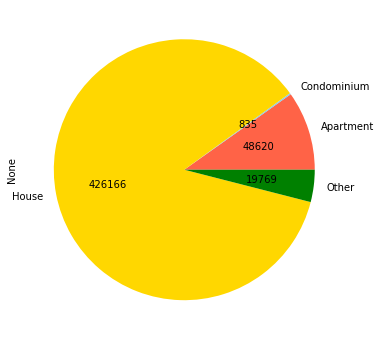

In [668]:
plt.figure(figsize=(6,6))
def label_function(val):
    return f'{val / 100 * len(df):.0f}'
df.groupby('new_building_desc').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},colors=['tomato','skyblue', 'gold', 'green'])
plt.show()

### Category Code Description

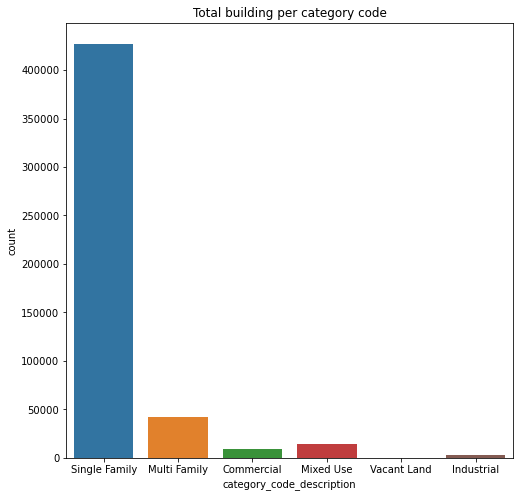

In [669]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='category_code_description')
plt.title('Total building per category code')
plt.show()

In [670]:
df[(df['category_code_description'].str.contains('Vacant'))]['category_code_description'].count()

31

In [671]:
df[df['overall_condition']>6]['overall_condition'].count()

5528

Since the shortage in vacant land property, we can give a recommendation to the customer to buy building with bad overall condition and comparable price with vacant land to be demolished.

### Central Air

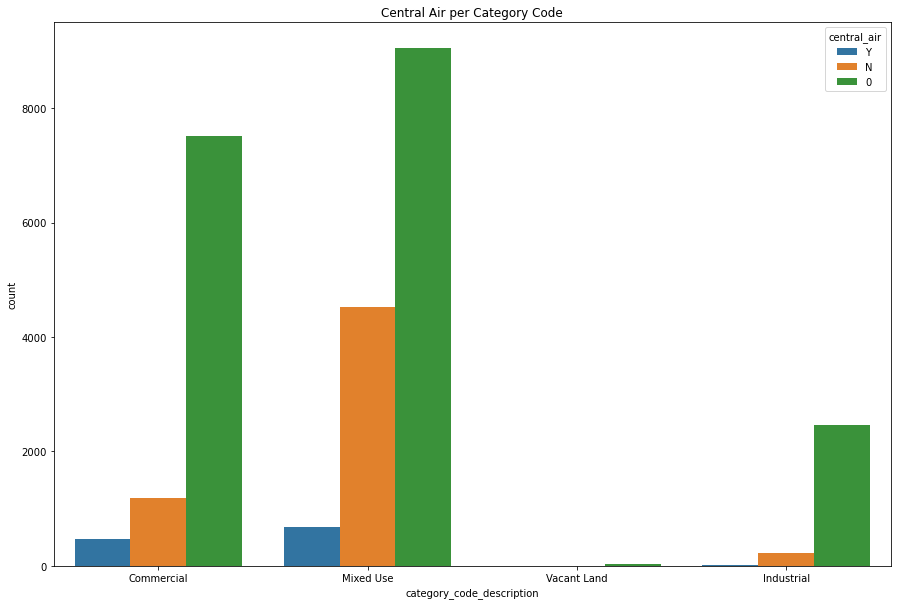

In [672]:
plt.figure(figsize=(15,10))
sns.countplot(data=df[(~df['category_code_description'].str.contains('Sing'))&(~df['category_code_description'].str.contains('Multi'))], x='category_code_description', hue='central_air')
plt.title('Central Air per Category Code')
plt.show()

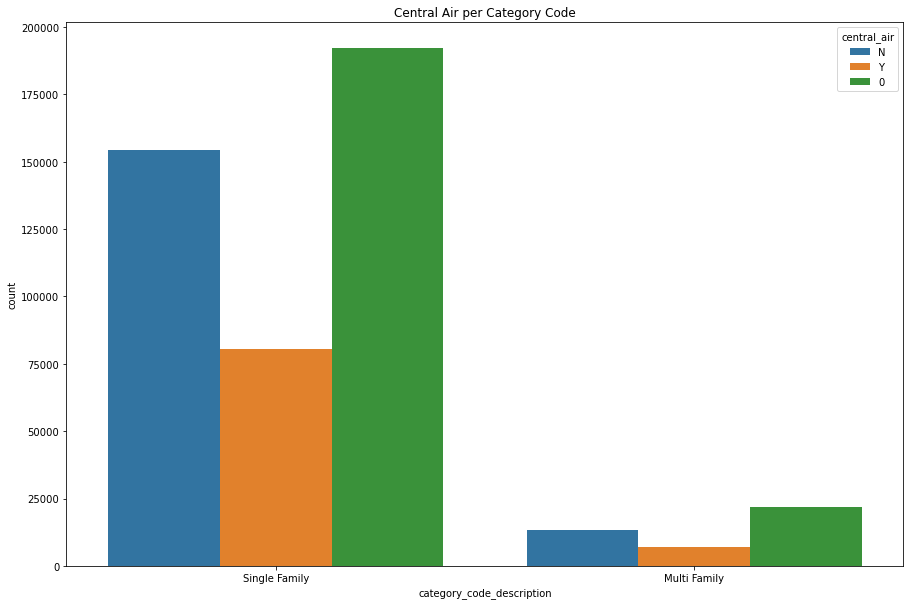

In [673]:
plt.figure(figsize=(15,10))
sns.countplot(data=df[(df['category_code_description'].str.contains('Sing'))|(df['category_code_description'].str.contains('Multi'))], x='category_code_description', hue='central_air')
plt.title('Central Air per Category Code')
plt.show()

<AxesSubplot:xlabel='central_air', ylabel='market_value'>

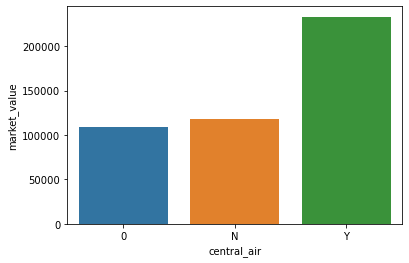

In [674]:
result = df.groupby(['central_air'])['market_value'].aggregate(np.median).reset_index().sort_values('market_value')
sns.barplot(data=df,x='central_air', y='market_value', estimator=np.median, order=result['central_air'],ci=None)

Central air has 3 unique values: Y, N, and 0. As we can see at the graph above, the median of market value for building with central air has the highest market value. Central air can have 2 function: cooling and heating. The temperature average in Philadelphia is around 30-40&deg;F and the highest temperature is around 80-90&deg;F and it just happen in June, so central air will has impact to property pricing if it has both functions.  
[Reference](https://weatherspark.com/h/y/22721/2021/Historical-Weather-during-2021-in-Philadelphia-Pennsylvania-United-States#Figures-Summary)

### Fireplaces

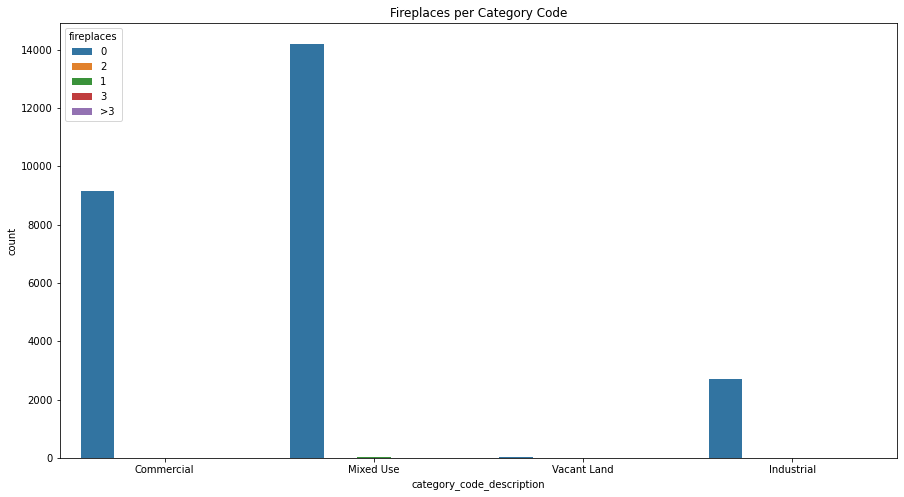

In [675]:
plt.figure(figsize=(15,8))
sns.countplot(data=df[(~df['category_code_description'].str.contains('Sing'))&(~df['category_code_description'].str.contains('Multi'))], x='category_code_description', hue='fireplaces')
plt.title('Fireplaces per Category Code')
plt.show()

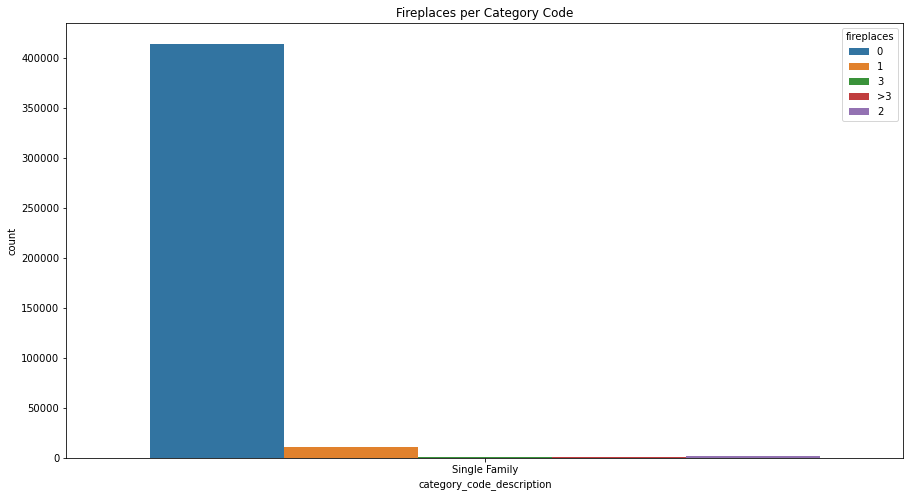

In [676]:
plt.figure(figsize=(15,8))
sns.countplot(data=df[(df['category_code_description'].str.contains('Sing'))], x='category_code_description', hue='fireplaces')
plt.title('Fireplaces per Category Code')
plt.show()

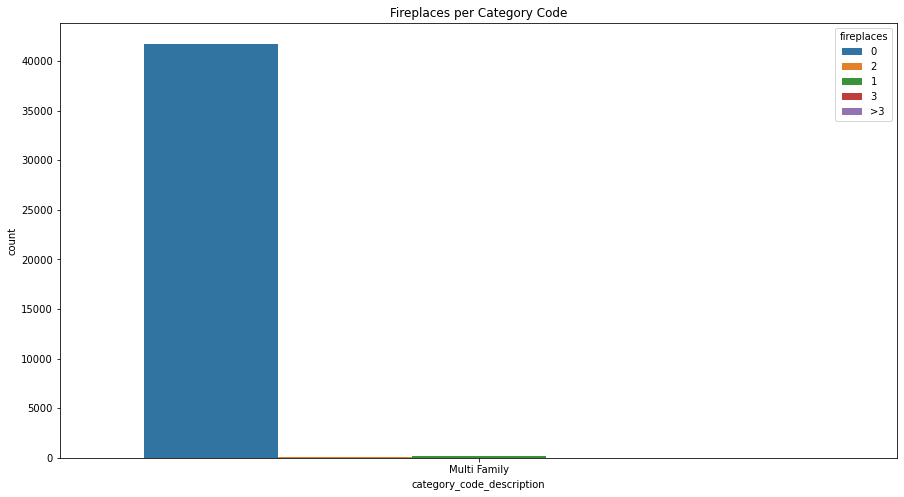

In [677]:
plt.figure(figsize=(15,8))
sns.countplot(data=df[(df['category_code_description'].str.contains('Multi'))], x='category_code_description', hue='fireplaces')
plt.title('Fireplaces per Category Code')
plt.show()

<AxesSubplot:xlabel='fireplaces', ylabel='market_value'>

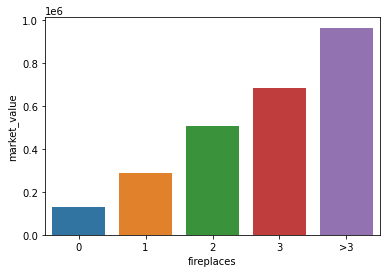

In [678]:
sns.barplot(data=df,x='fireplaces', y='market_value', estimator=np.median,ci=None)

In [679]:
df[df['central_air']=='Y']['fireplaces'].value_counts()

0     82160
1      4876
2       841
3       354
>3      231
Name: fireplaces, dtype: int64

In [680]:
df[df['central_air']=='Y']['category_code_description'].value_counts()

Single Family    80453
Multi Family      6836
Mixed Use          686
Commercial         470
Industrial          15
Vacant Land          2
Name: category_code_description, dtype: int64

Fireplaces are usually placed on the living room or near to the dining room where the family is gathering. So, it is normal for commercial and industrial building to have no fireplace. It also can be place on outdoor, but in our data all vacant land has no fireplaces. Having central air cannot determine whether the house has fireplaces or not, it might be because not all central air can be used for heating.

In [681]:
df[df['fireplaces']=='1']['number_stories'].describe()

count    11034.000000
mean         2.377379
std          0.629359
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_stories, dtype: float64

In [682]:
df[df['fireplaces']=='2']['number_stories'].describe()

count    1509.000000
mean        2.760437
std         0.648221
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: number_stories, dtype: float64

In [683]:
df[df['fireplaces']=='3']['number_stories'].describe()

count    642.000000
mean       2.841121
std        0.614178
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: number_stories, dtype: float64

In [684]:
df[df['fireplaces']=='>3']['number_stories'].describe()

count    424.000000
mean       2.937500
std        0.591695
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: number_stories, dtype: float64

Most of the buildings with fireplaces more than 1, also has 3 or more stories.

### Other Building

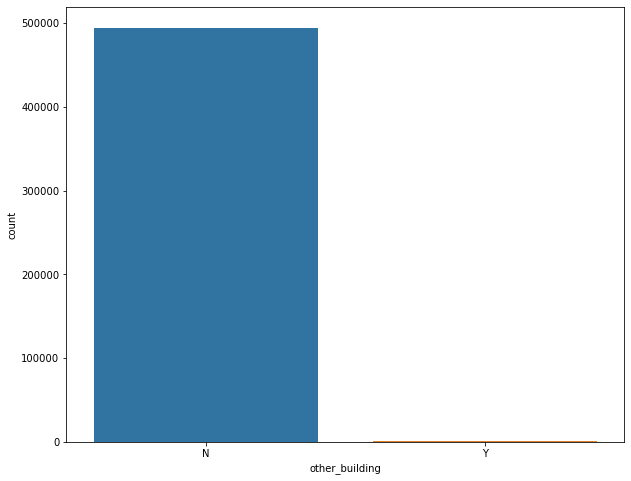

In [685]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='other_building')
plt.show()

Text(0.5, 1.0, 'Market Value per Other Building')

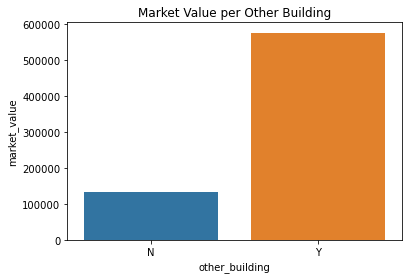

In [686]:
sns.barplot(data=df,x='other_building', y='market_value', estimator=np.median,ci=None)
plt.title('Market Value per Other Building')

In [687]:
df[df['other_building']=='Y']['category_code_description'].value_counts()

Commercial       270
Industrial       193
Single Family    156
Multi Family     117
Mixed Use         44
Vacant Land        1
Name: category_code_description, dtype: int64

As we can see in chart above, most of the building doesn't have other building, but the presence of other building has an impact to the median of property market value.

### Parcel Shape

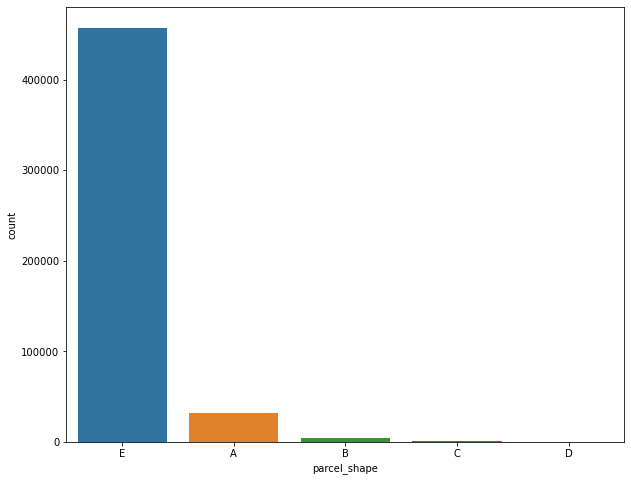

In [688]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='parcel_shape')
plt.title('')
plt.show()

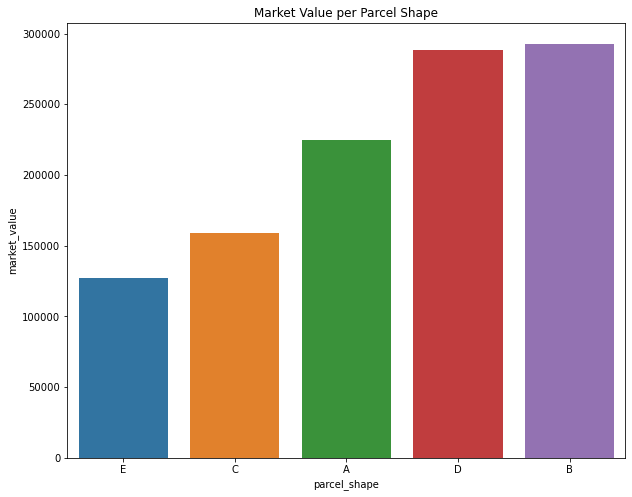

In [689]:
plt.figure(figsize=(10,8))
result = df.groupby(["parcel_shape"])['market_value'].aggregate(np.median).reset_index().sort_values('market_value')
sns.barplot(data=df,x='parcel_shape', y='market_value', estimator=np.median, order=result['parcel_shape'],ci=None)
plt.title('Market Value per Parcel Shape')
plt.show()

### Street Designation

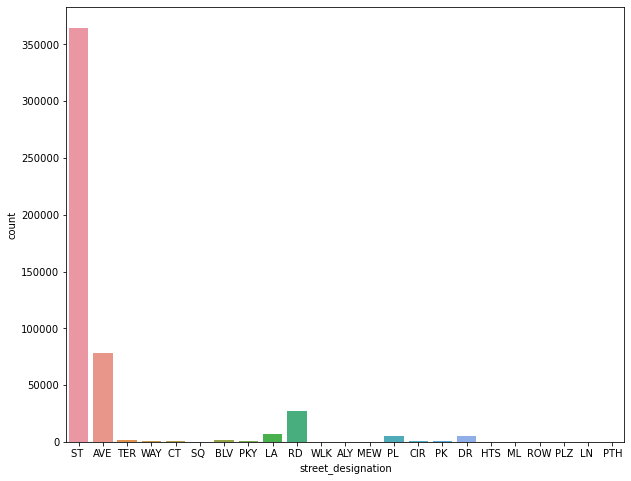

In [690]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='street_designation')
plt.show()

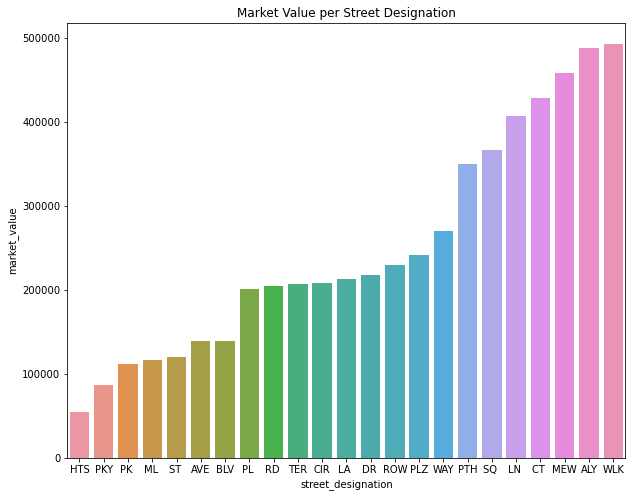

In [691]:
plt.figure(figsize=(10,8))
result = df.groupby(["street_designation"])['market_value'].aggregate(np.median).reset_index().sort_values('market_value')
sns.barplot(data=df,x='street_designation', y='market_value', estimator=np.median, order=result['street_designation'],ci=None)
plt.title('Market Value per Street Designation')
plt.show()

Street Designation has an impact to the market value. If the customers have high consideration about the price, selecting data based on the street designation can be our approach (based on median).

### Topography

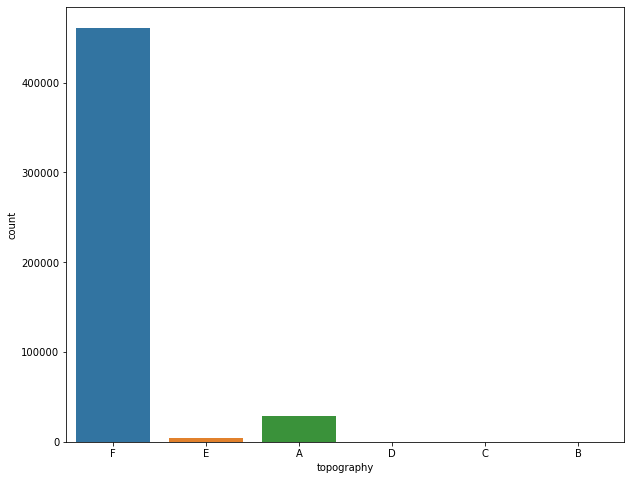

In [692]:
plt.figure(figsize=(10,8))
sns.countplot(data=df[df['topography']!='0'], x='topography')
plt.title('')
plt.show()

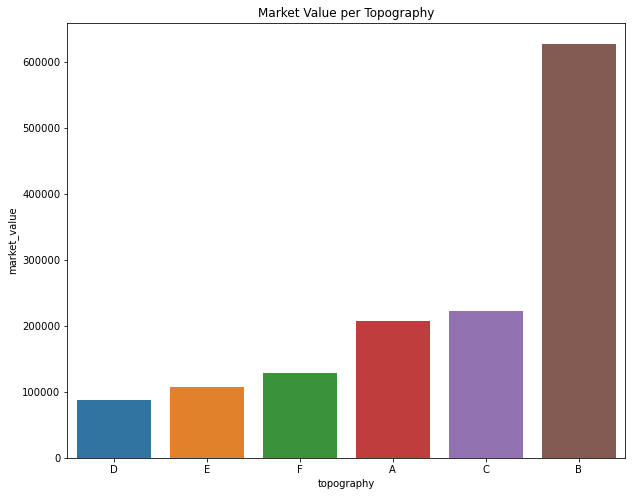

In [696]:
plt.figure(figsize=(10,8))
result = df[df['topography']!='0'].groupby(["topography"])['market_value'].aggregate(np.median).reset_index().sort_values('market_value')
sns.barplot(data=df[df['topography']!='0'],x='topography', y='market_value', estimator=np.median, order=result['topography'],ci=None)
plt.title('Market Value per Topography')
plt.show()

### Unfinished

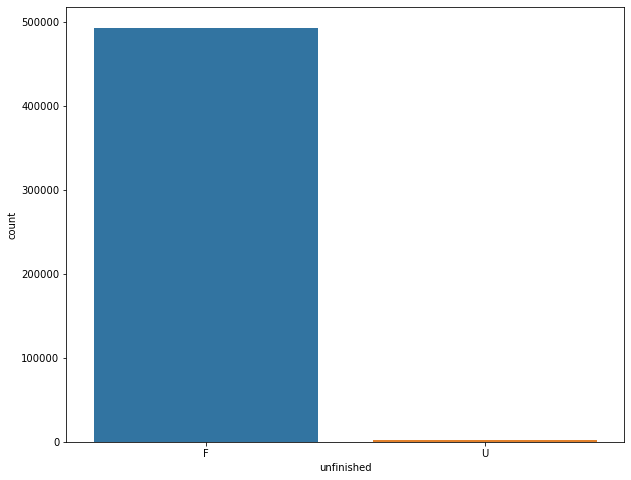

In [711]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='unfinished')
plt.title('')
plt.show()

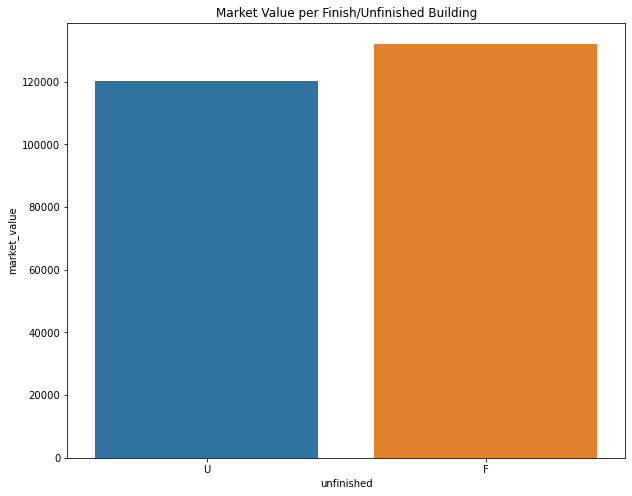

In [698]:
plt.figure(figsize=(10,8))
result = df.groupby(['unfinished'])['market_value'].aggregate(np.median).reset_index().sort_values('market_value')
sns.barplot(data=df,x='unfinished', y='market_value', estimator=np.median, order=result['unfinished'],ci=None)
plt.title('Market Value per Finish/Unfinished Building')
plt.show()

In [699]:
df[df['unfinished']=='F']['overall_condition'].describe()

count    493399.000000
mean          3.895867
std           0.708685
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           7.000000
Name: overall_condition, dtype: float64

In [700]:
df[df['unfinished']=='U']['overall_condition'].describe()

count    1991.000000
mean        3.888498
std         1.297223
min         0.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         7.000000
Name: overall_condition, dtype: float64

From the barplot above, the market values between finished and unfinished building are comparable. Thus, the feature only slightly affect the market value.

### View Type

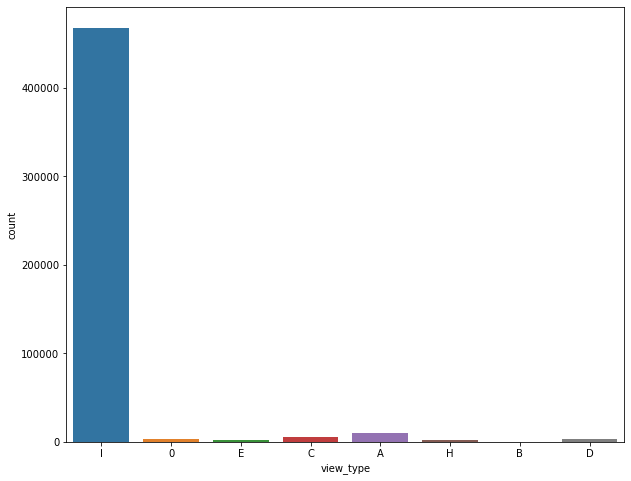

In [701]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='view_type')
plt.title('')
plt.show()

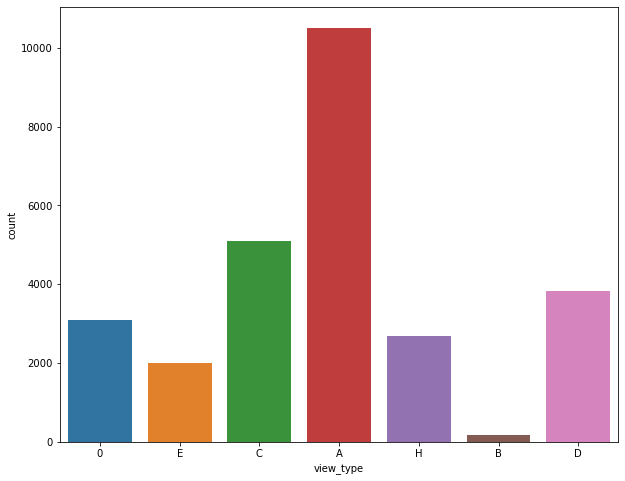

In [702]:
# I been take out since it is other or typical and has very high value compare to other view type
plt.figure(figsize=(10,8))
sns.countplot(data=df[df['view_type']!='I'], x='view_type')
plt.title('')
plt.show()

In [703]:
# I been take out since it is other or typical and has very high value compare to other view type
df1=df.copy()
df1=df1[df1['view_type']!='I']
df1.reset_index(drop=True,inplace=True)

In [704]:
pd.crosstab(df1.view_type, df1.new_building_desc, normalize='columns')

new_building_desc  Apartment  Condominium     House     Other
view_type                                                    
0                   0.222047     0.354839  0.090007  0.219347
A                   0.271181     0.451613  0.415777  0.154652
B                   0.000630     0.032258  0.007046  0.002465
C                   0.108031     0.129032  0.209085  0.016636
D                   0.280945     0.032258  0.092444  0.518792
E                   0.043780     0.000000  0.078750  0.055453
H                   0.073386     0.000000  0.106891  0.032656

Text(0.5, 1.0, 'Percentage building description per View Type')

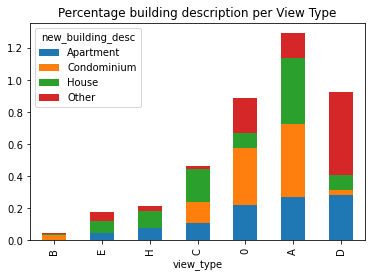

In [705]:
pd.crosstab(df1.view_type, df1.new_building_desc, normalize='columns').sort_values(by=['Apartment']).plot.bar(stacked=True)
plt.title('Percentage building description per View Type')

Most of the building with Other type frequently found with view type D (Commercial) this is make sense since Other is all building other than residence.

### Parking Spaces

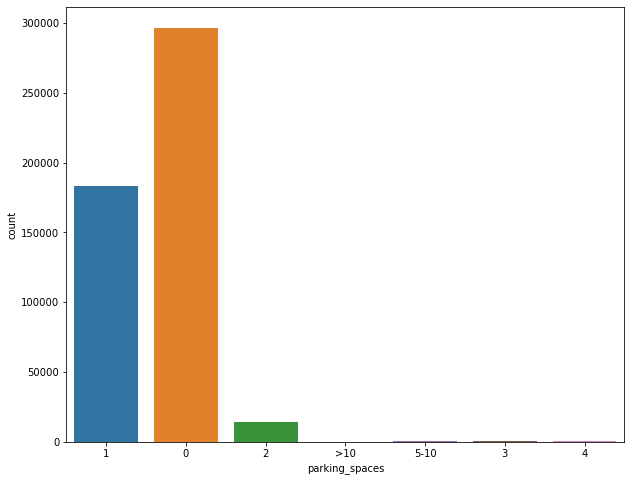

In [707]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='parking_spaces')
plt.title('')
plt.show()

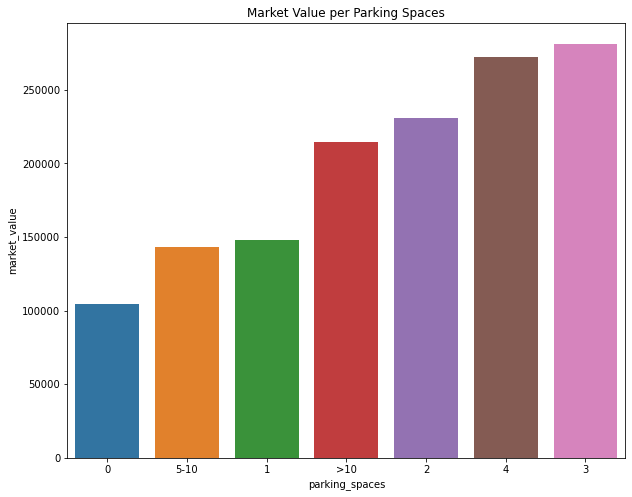

In [708]:
plt.figure(figsize=(10,8))
result = df.groupby(['parking_spaces'])['market_value'].aggregate(np.median).reset_index().sort_values('market_value')
sns.barplot(data=df,x='parking_spaces', y='market_value', estimator=np.median, order=result['parking_spaces'],ci=None)
plt.title('Market Value per Parking Spaces')
plt.show()

There is anomaly at 5-10 and >10 parking spaces it has lower market value compare to 2-4 parking spaces. 4 parking spaces market value slightly lower than 3's.

# Summary

Based on detailed and thorough  EDA:
- Label: 
    - Market value has a lot of outliers, resulting in extreme positive skewness. Properly handling outliers will be a challenge in modeling process, since this is a real-world data.
- Numerical Features:
    - Depth and Frontage will be dropped, represented by total area. However, based on correlation result, frontage has more impact than depth towards market price, because it is hypothetically affecting the visibility and accessibility of the properties.
    - Total area and total livable are positively correlated with market price.
    - Number of rooms, number of bedrooms, number of bathrooms are strongly correlated with each other. But, we kept them all because they represent different things that may be an important reason for a person to buy a property, also positively correlated with market value.
    - Number of stories correlated with number of bathrooms and total livable area, which is pretty straightforward.
    - The better the overall condition, the higher the market value.
    - Property age didn't indicate a bad condition of the property, thus didn't really affecting the market price.
    - Sale year didn't really correlate with market value. However, theoretically, since we use all the data, we need this column as a corrector of the model.
    - City development of Philadelphia starts from city center.
    - City center and its adjacent area has higher market value.
    - However, the more far the distance from city center, also resulting in increase of total livable area, that may explain the high market value.
- Categorical Features:
    - Building code description contains a valuable information about the properties. This column will be extracted to get 3 new columns to describe 4 types of building code (house, condominium, apartment, and other).
    - Category code description can be used to get insight if we don't have building suitable to customer criteria. Example: We don't have many vacant lands, if the customer want to buy vacant lands, we can give recommendation to buy building with bad condition with comparable price.
    - Average temperature in Philadelphia is around 30-40&deg;F with the highest temperature is around 80-90&deg;F. That make central air that have heating function and fireplaces will be considered as a plus point which impact the market value.
    - The existence of other building impact the market value, it's probably because it increase total area and/or total livable area.
    - Street Designation showing the street type and it has impact to the market value. We can give recommendations to the customer with high consideration about price by selecting building based on the street designation.
    - Finish or unfinished condition of the building has slightly different market value.
    - Using the extracted building code description, it's clear that commercial view types are dominated with commercial building type.
    - Overall, the more parking spaces the property has, the higher the market value became. Hypothetically, this is normal since it may impact the total area.

**Caution:** It is clear that some features are correlated to others, for example: the relationships of distance from city center and total livable area towards the property market value. One important thing to note is that bivariate analysis can't cover or explain all the interactions between features and/or label, that may explain why sale year or other features didn't correlate much with the market value, even though they are logically really affecting the market value. Maybe they are confounder and need the presence of other features (multi-indexing/stratification) to see the real effect. Since our goal is to predict the market value, we will skip the multivariate analysis, since it will require us to made another model building. And also, we will still include all the weak features based on Spearman's Rank Order Correlation in the modeling process, on the basis of domain knowledge.